# Insurance Marketing

Dependent Variable -Customer Life Time Value (Regression),Response(Classification)

In marketing, customer lifetime value (CLV or often CLTV), lifetime customer value (LCV), or life-time value (LTV) is a prediction of the net profit attributed to the entire future relationship with a customer.

Link to the Dataset- https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data?select=WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.stats.api as sms
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy.stats import normaltest,f_oneway
from scipy.stats import ttest_ind
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix,accuracy_score, classification_report,f1_score,cohen_kappa_score

C:\Users\Vivek\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',999)

# READING THE DATA SET.

In [3]:
data = pd.read_csv('Insurance_Marketing.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
data.shape

(9134, 24)

This data set has 9134 rows and 24 columns

In [8]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [9]:
cat_var = [key for key in dict(data.dtypes)
             if dict(data.dtypes)[key] in ['object'] ] #Categorical Variable

In [10]:
cat_var

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [11]:
num_var = [key for key in dict(data.dtypes)
                   if dict(data.dtypes)[key]
                       in ['float64','float32','int32','int64']] # Numeric Variable

In [12]:
num_var

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [14]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


The above table shows the Statistical summary for numerical columns

In [15]:
data.describe(include='all')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,UH79028,California,NaN,No,Basic,Bachelor,1/10/2011,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,5779,5298,NaN,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,NaN,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,NaN,NaN,109.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


The above table shows the statistial summary for all the categorical and numerical we get NAN because categorical columns will not have mean median mode etc

# NULL VALUE'S CHECK.

In [16]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

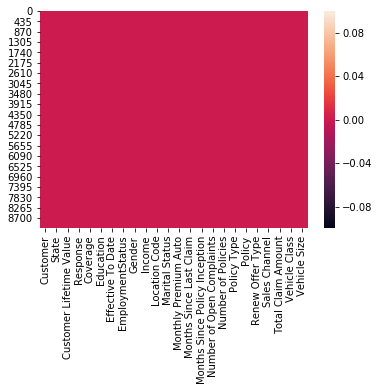

In [17]:
sns.heatmap(data.isnull())
plt.show()

There are no Null Values in this dataset.if we have null values we have to handle null values based on the percentage of nulls in each column and we can impute it
The ways of imputing also has a reflection in the accuracy of the model
1.Drop the nulls if we have 80 percent or more 
2.impute with mode median mode or 0
3.imputation can be done with other techniques as knn imputation or mice imputation

# CHECKING FOR CORRELATIONS

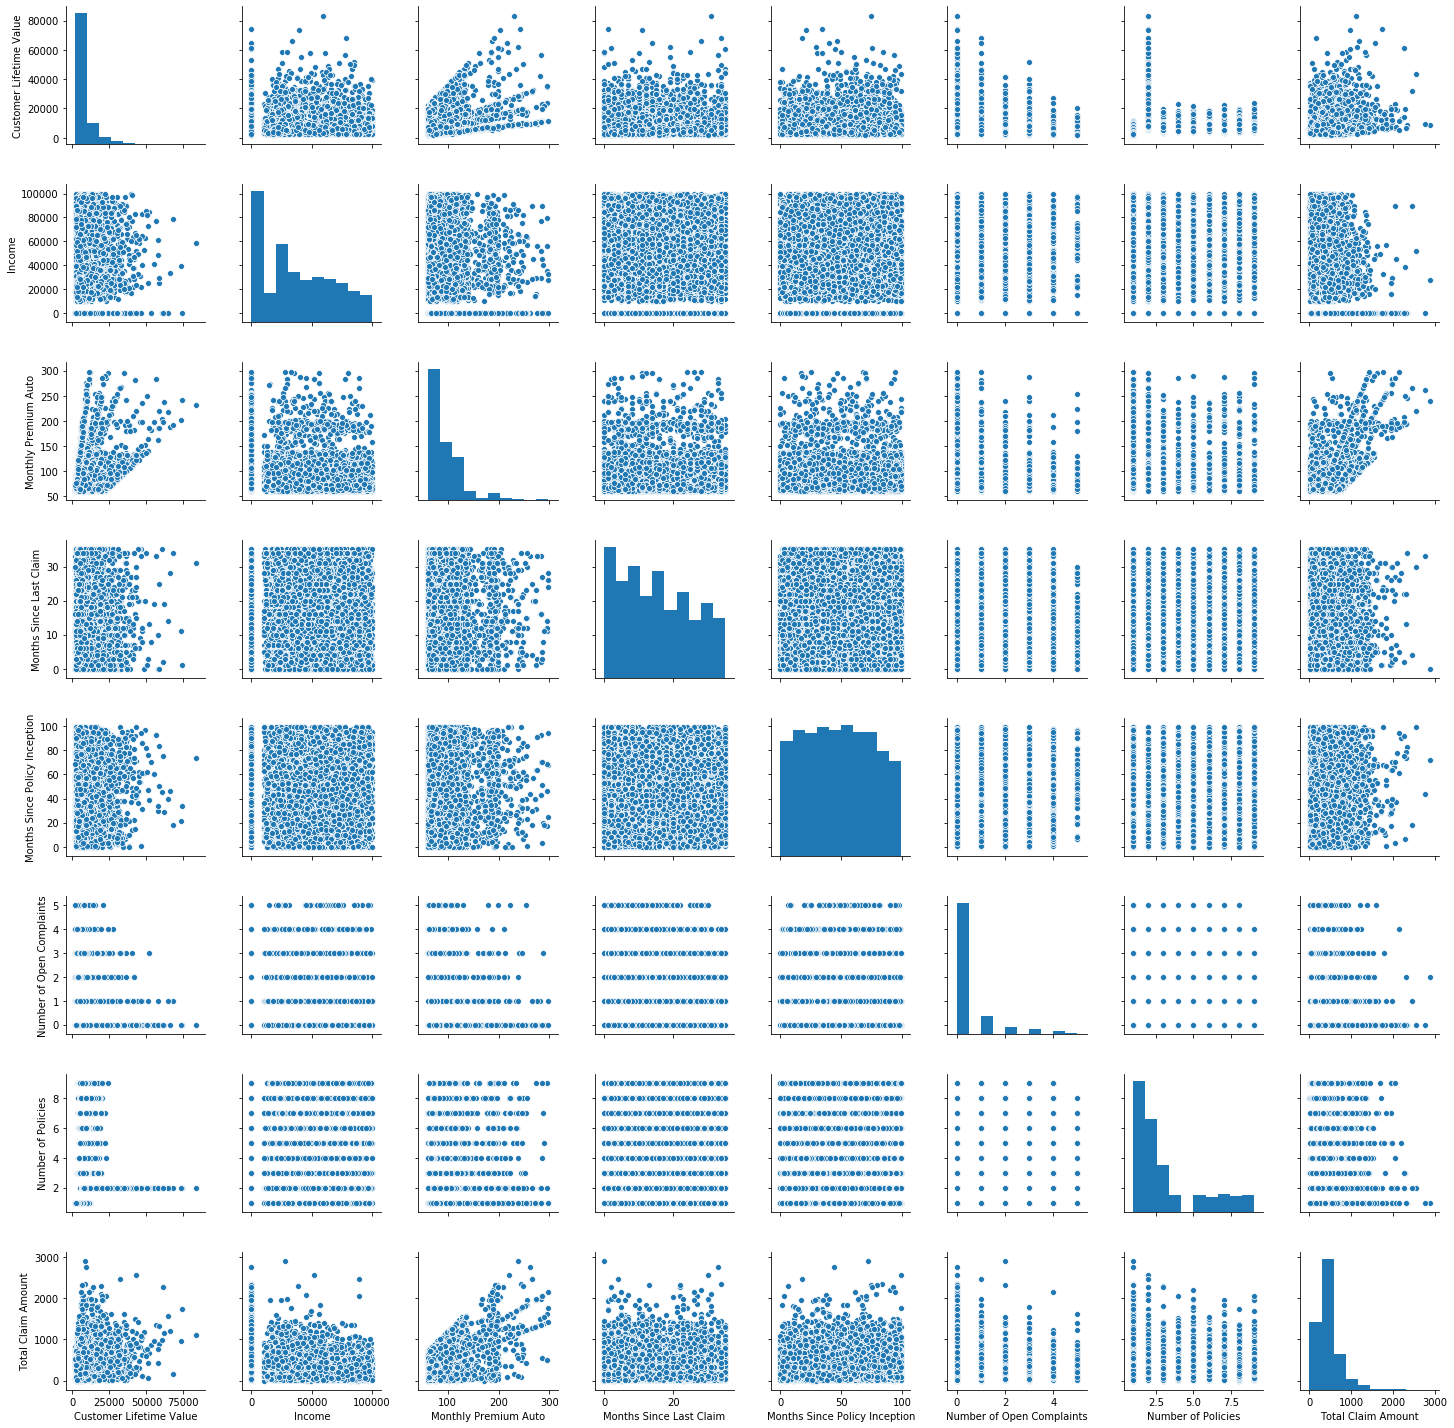

In [31]:
sns.pairplot(data)
plt.show()

In [32]:
data.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


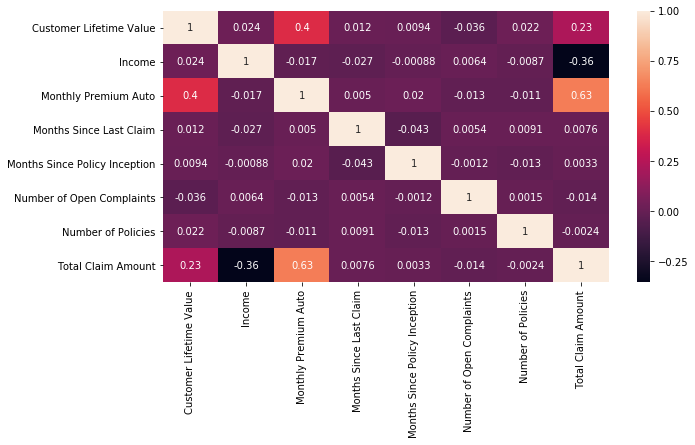

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

# DATA VISUALIZATION AND INFERENCES.

#### UNI-VARIATE ANALYSIS

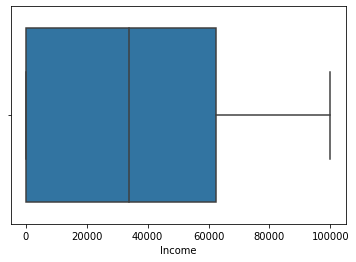

In [35]:
sns.boxplot(data['Income'])
plt.show()

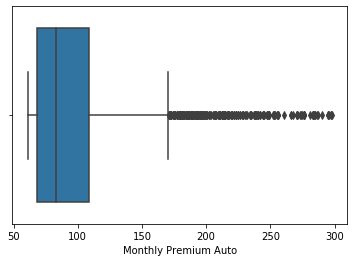

In [36]:
sns.boxplot(data['Monthly Premium Auto'])
plt.show()

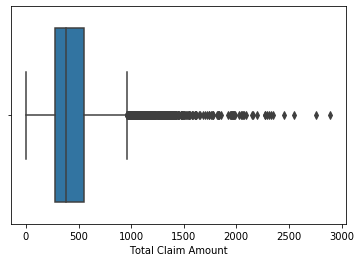

In [37]:
sns.boxplot(data['Total Claim Amount'])
plt.show()

As we can see that there are outlier's in the total claim amount feature and also the income feature, the general trend is to remove the outlier's are a better model , since our DOMAIN is related to insurance and banking industry, we must be accepting the outlier's as they are the potential high revenue making customer's.
And there are no outlier's in the income feature.
Conclusion: WE ARE NOT DOING ANY OUTLIER TREATMENT.

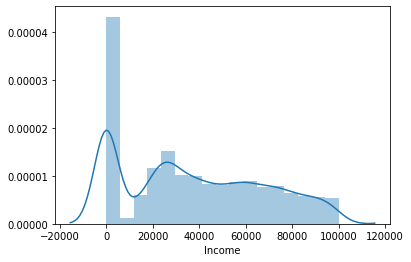

In [38]:
sns.distplot(data['Income'])
plt.show()

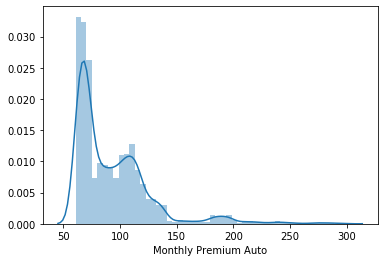

In [39]:
sns.distplot(data['Monthly Premium Auto'])
plt.show()

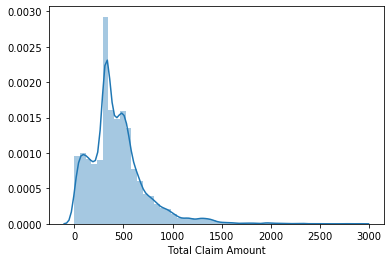

In [40]:
sns.distplot(data['Total Claim Amount'])
plt.show()

As we can see that none of the continuous features are normally distributed, no matter what distribution a particular feature tend's to follow we as data analyst, we are inclined to make it normal, but there is a possible chance that the feature may follow some other distribution, So in our case , we want to make the distribution's normal, we can apply some transformation's to the data and see if we can achieve a normally distributed feature.

# CATEGORICAL VARIABLE UNIVARIATE ANALYSIS

In [41]:
cat_var

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

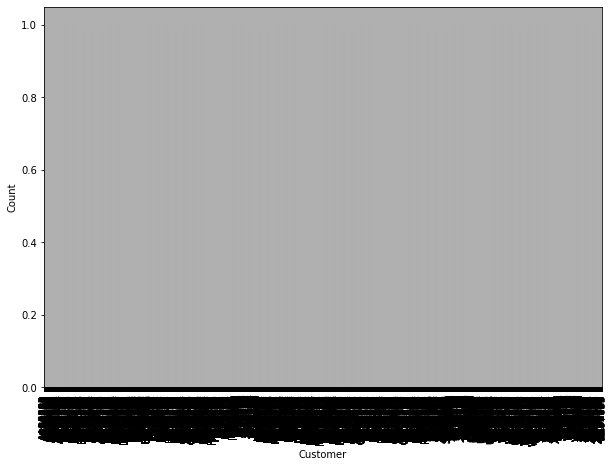

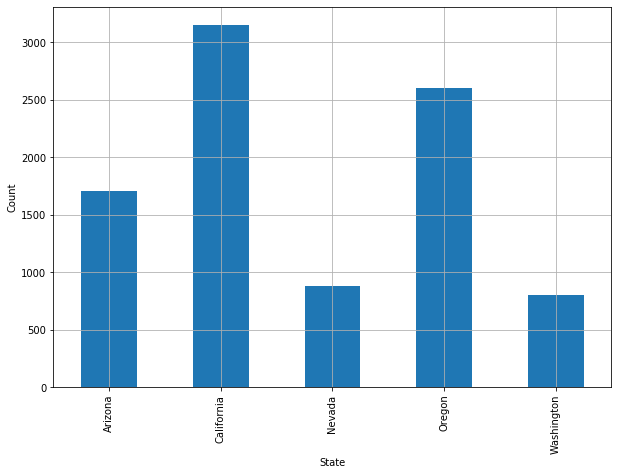

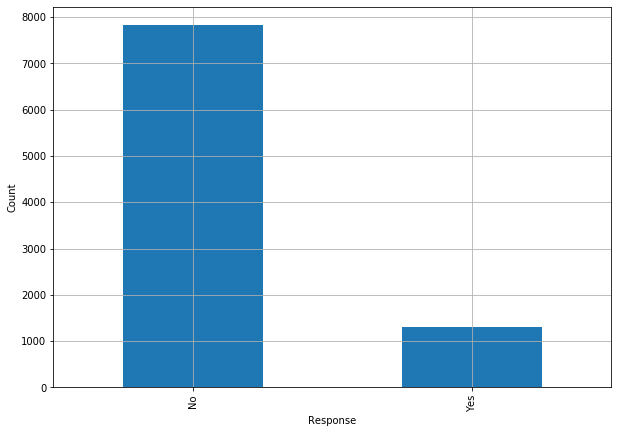

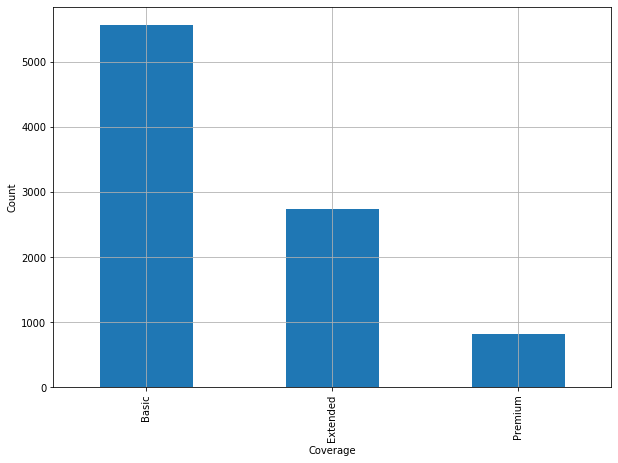

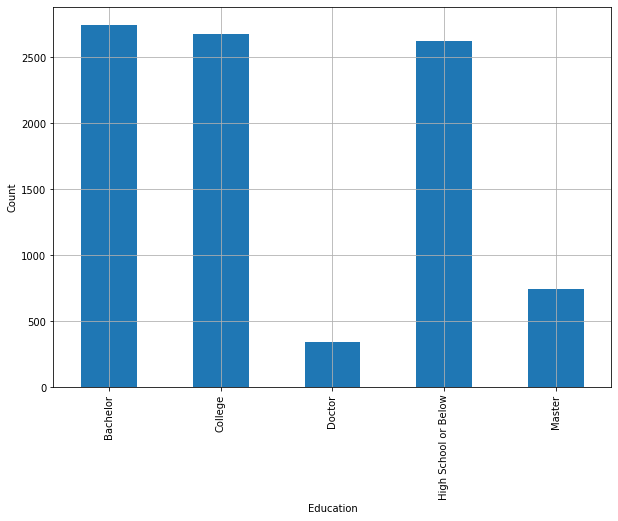

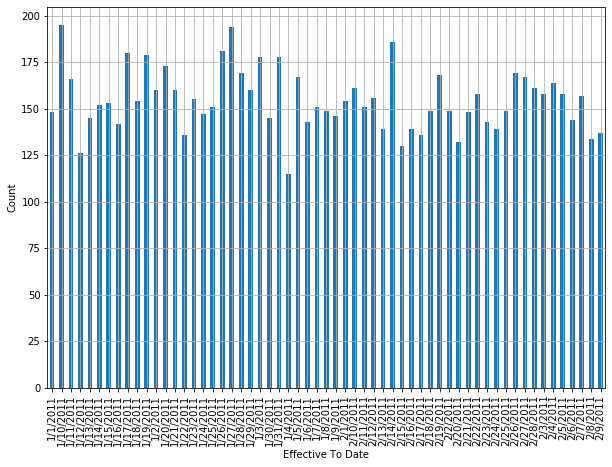

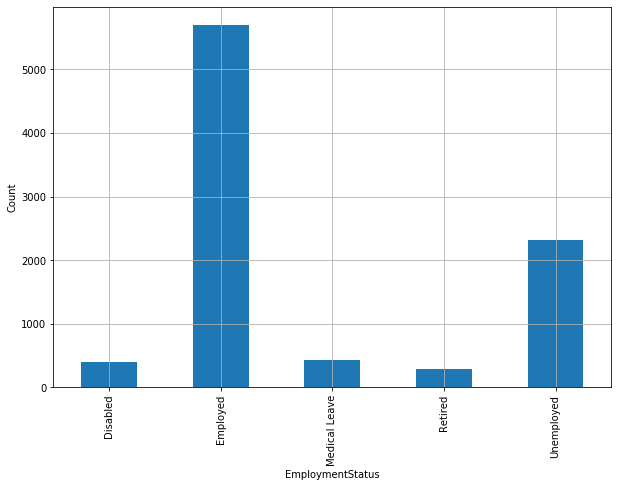

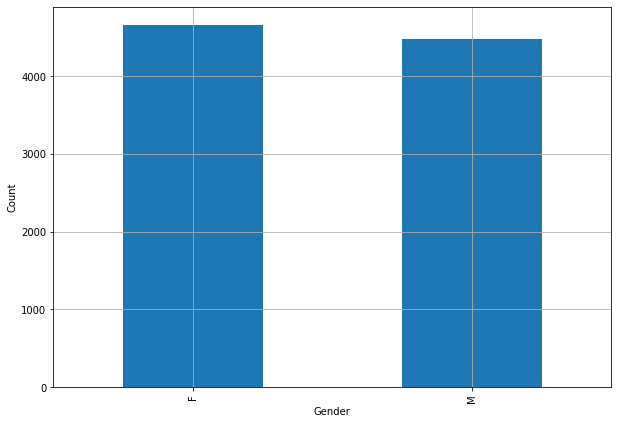

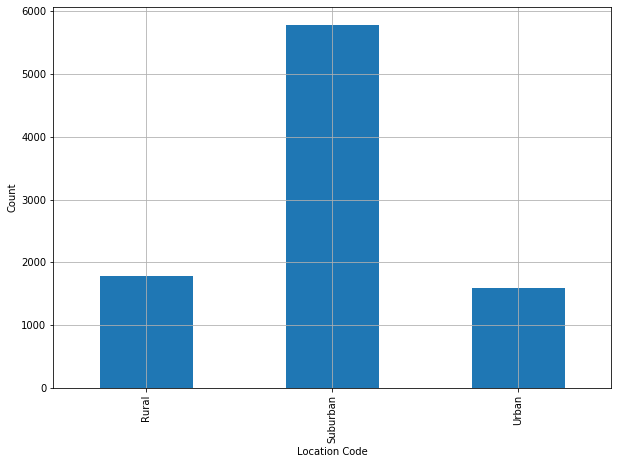

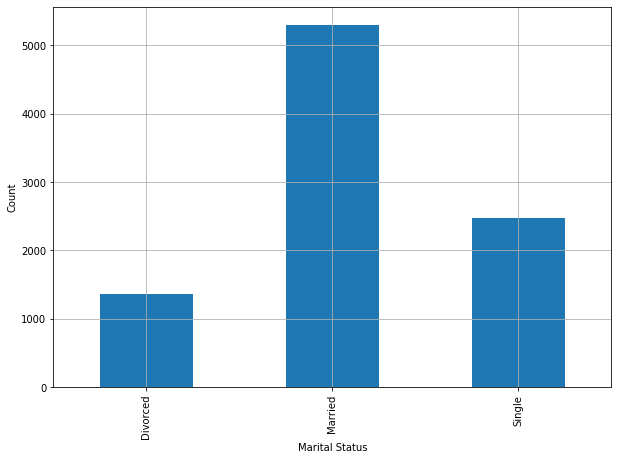

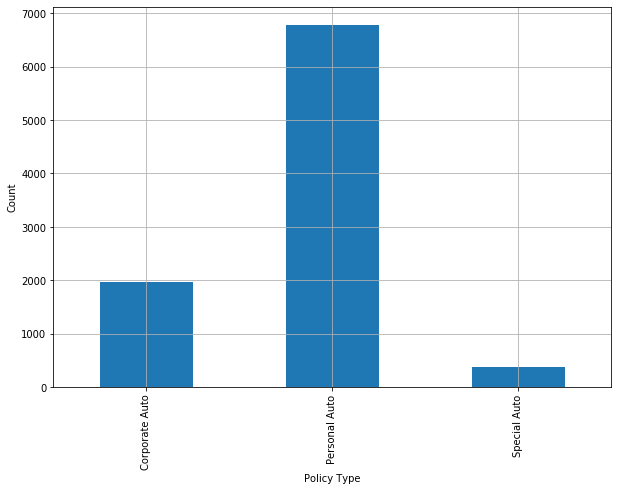

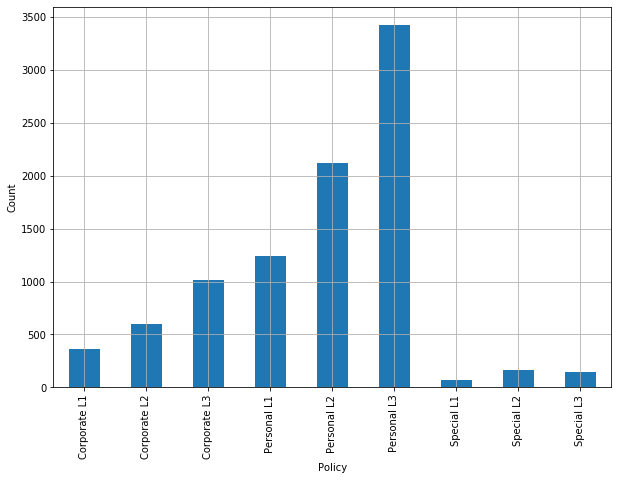

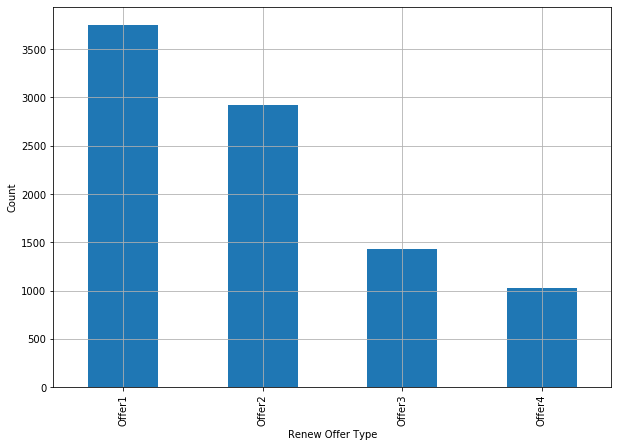

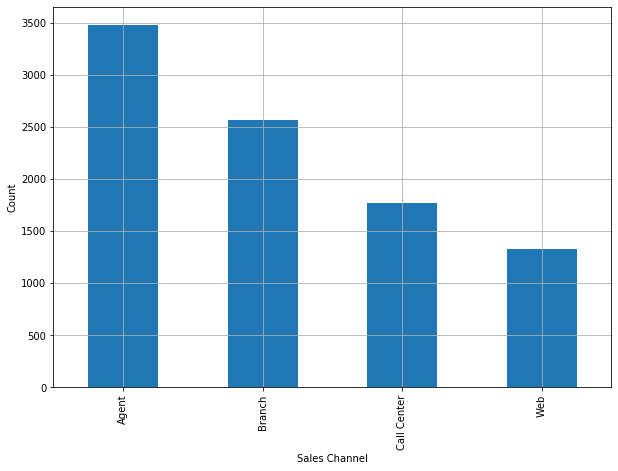

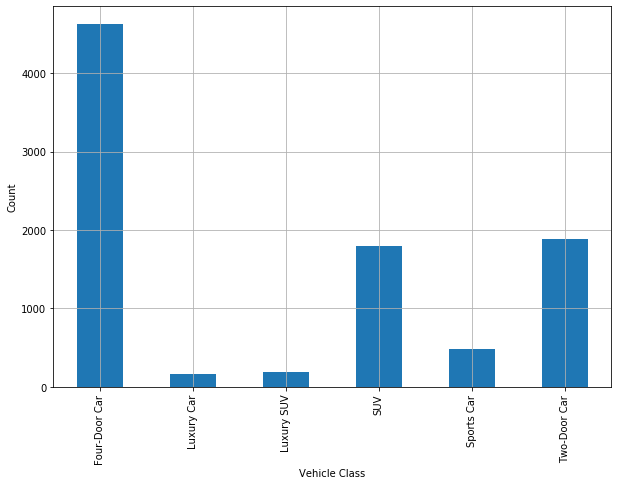

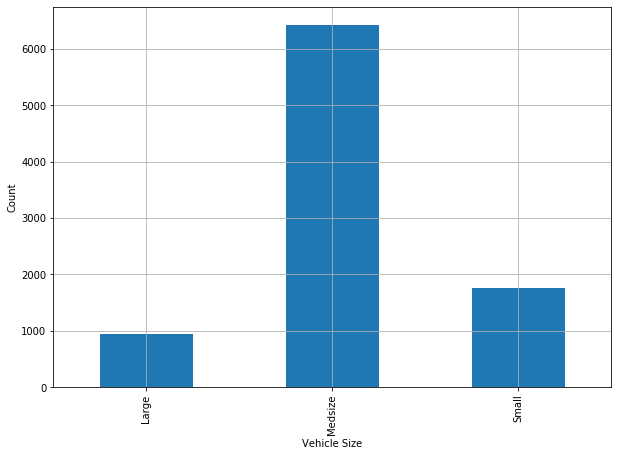

In [42]:
for i in cat_var:
    data.groupby(i)['Customer'].count().plot(kind='bar', grid=True,
    figsize=(10, 7)).set_ylabel('Count')
    plt.show()

# TRANSFORMATION OF THE NUMERICAL FEATURES

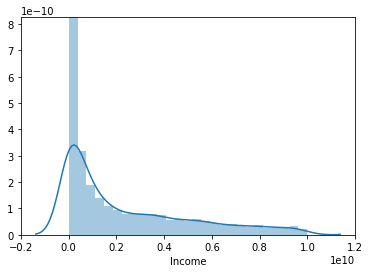

In [43]:
sns.distplot(data['Income']**2)
plt.show()

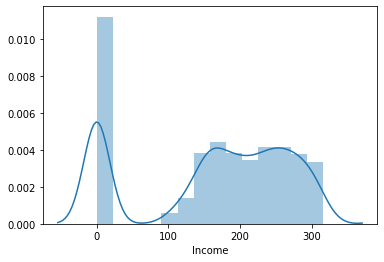

In [44]:
sns.distplot(data['Income']**(1/2))
plt.show()

As we can see that while we are trying to transform the data to make it normal,rather the distribution is getting skewed, or is having multiple peaks which again is a problem to our model, hence we just stick with the same distribution of the feature.

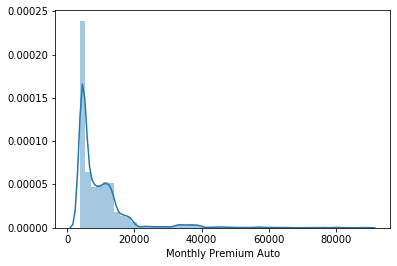

In [45]:
sns.distplot(data['Monthly Premium Auto']**(2))
plt.show()

The monthly premium auto feature has multiple peak's so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE) but as we can see that after the square transformation the data is getting heavily skewed, so we stick with the actual distribution again.

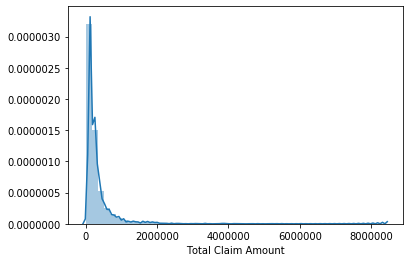

In [46]:
sns.distplot(data['Total Claim Amount']**2)
plt.show()

Again for the total claim amount after applying the transformation's the data is getting skewed, and hence we stick to the actual distibution of the data.

Conclusion: No matter what power transformation we are applying to the numerical features, it is still not getting normally distributed, and moreover the data is getting skewed, so rather we will just stick with the actual distribution of the feature in our model building.

# Bivariate Analysis with respect to target variable(Customer LifeTime Value)

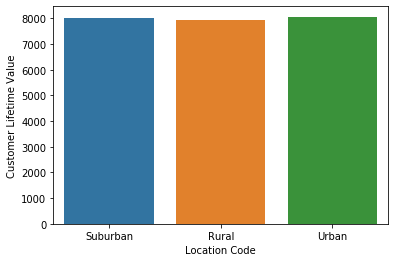

In [47]:
sns.barplot(x = 'Location Code',y='Customer Lifetime Value',data = data,ci=0)
plt.show()

The average customer lifetime value of the customer who stay in different location code's is the same so while creating the model we can dis regard the feature.

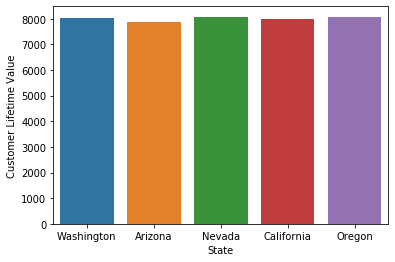

In [48]:
sns.barplot(x = 'State',y='Customer Lifetime Value',data = data,ci=0)
plt.show()

The average customer lifetime value of the customer who stay in different state is the same so while creating the model we can dis regard the feature.

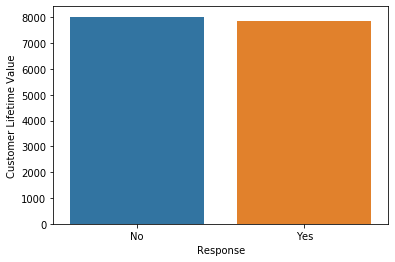

In [49]:
sns.barplot(x = 'Response',y='Customer Lifetime Value',data = data,ci=0)
plt.show()

It doesn't matter if the customer take's the marketing call, or he doesn't as the average customer lifetime value for both of them is the same.

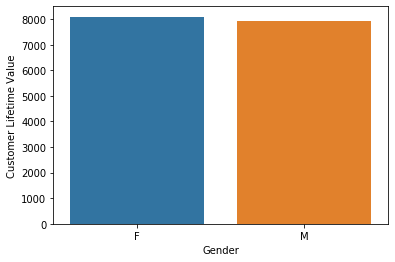

In [50]:
sns.barplot(x = 'Gender',y='Customer Lifetime Value',data = data,ci=0)
plt.show()

Our model , is not biased based on gender, but still we can see that the average customer lifetime value is the same for both male and female.

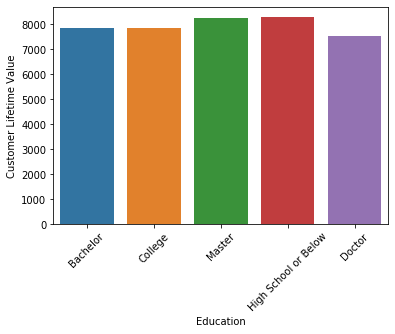

In [51]:
sns.barplot(x = 'Education',y='Customer Lifetime Value',data = data,ci=0)
plt.xticks(rotation=45)
plt.show()

We can also see that education is not a significant feature for assesing the lifetime value of the customer.

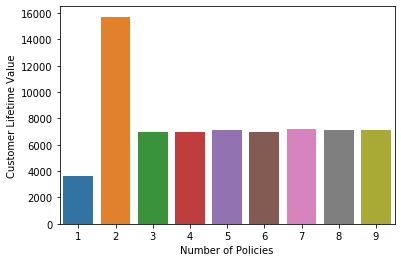

In [52]:
sns.barplot(x = 'Number of Policies',y='Customer Lifetime Value',data = data,ci=0)
plt.show()

We can see a pattern here, customer's who have taken only 1 policy have lower customer lifetime value, and customer's who have taken 3 or greater show a similar trend, so we can bin all the customer who have taken number of policies 3 or greater into one bin, and suprisingly we can also see that the customer's who have taken 2 policies have very high customer lifetime value comparitively, which is challenging part to answer why, domain knowledge is much required here.

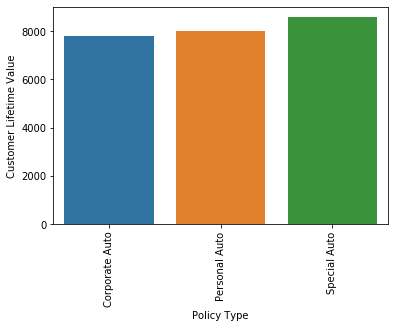

In [53]:
sns.barplot(x = 'Policy Type',y='Customer Lifetime Value',data = data,ci=0)
plt.xticks(rotation = 90)
plt.show()

There isn't much difference in the customer lifetime value W.R.T what policy type he has taken, all we need is how much revenue a customer can bring to the company, so it doesnt matter what type of policy he/she has chosen.

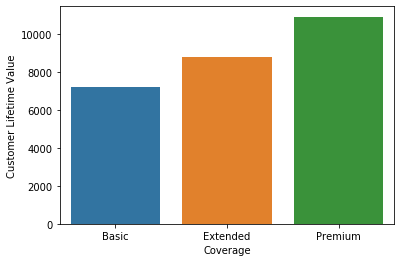

In [54]:
sns.barplot(x = 'Coverage',y='Customer Lifetime Value',data = data,ci=0)
plt.show()

Customer Lifetime Value is different for different coverage, as we can also see that visually which make's sense, better the coverage better the monthly premium amount a custoemr pay's , better the revenue from that particular customer.

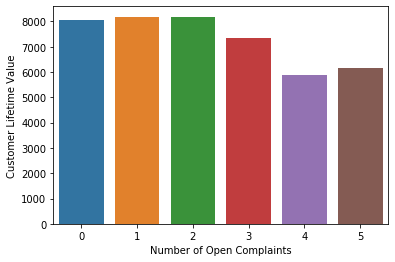

In [55]:
sns.barplot(x = 'Number of Open Complaints',y='Customer Lifetime Value',data = data,ci=0)
plt.show()

Number of open complaint's also show kind of similar trend, where people who have complaints 2 or lesser have a similar pattern but where as >3 do not show any pattern we will have to do statistical test's to understand if this feature is really significant or it isn't.

In [56]:
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / data.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')             
def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

# BiVariate Analysis with respect to Response Variable

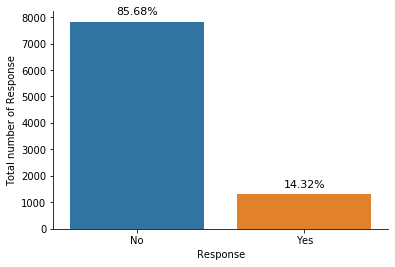

In [57]:
ax = sns.countplot('Response',data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

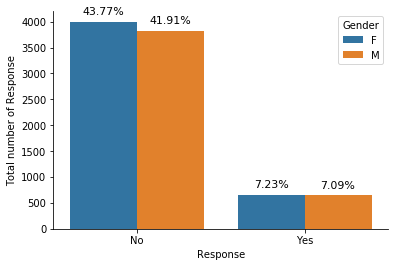

In [58]:
ax = sns.countplot('Response',hue = 'Gender' ,data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.07,5)
plt.show()

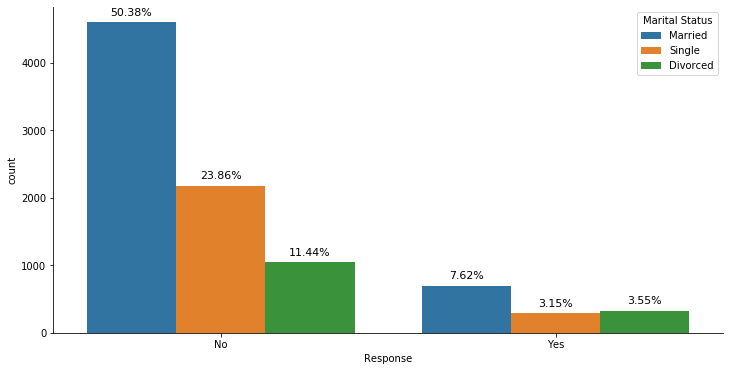

In [59]:
plt.figure(figsize=(12,6))
ax = sns.countplot('Response', hue = data['Marital Status'], data = data)
annot_plot(ax,0.08,1)
plt.show()

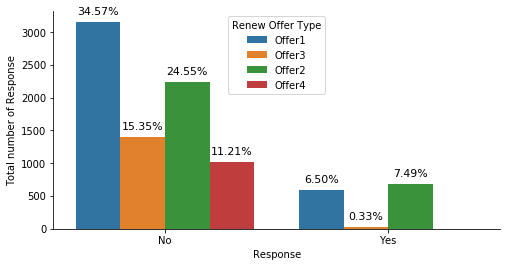

In [60]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response',hue = 'Renew Offer Type' ,data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

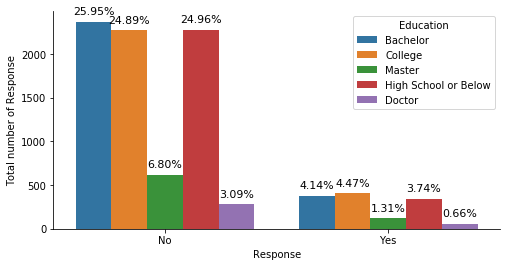

In [61]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response',hue = 'Education' ,data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

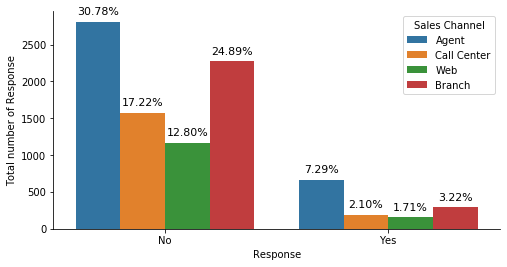

In [62]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response',hue = 'Sales Channel' ,data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

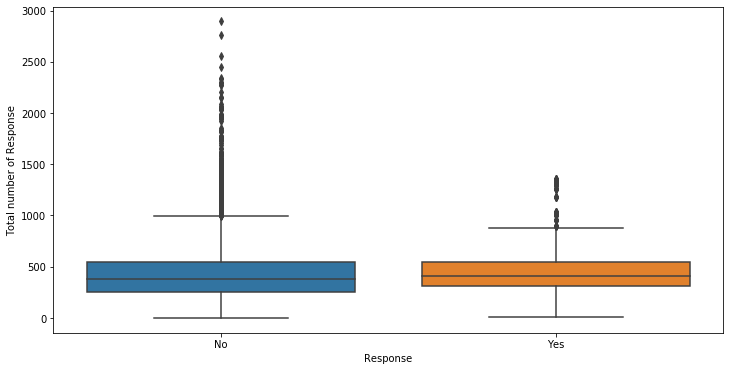

In [63]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Total Claim Amount' , x = 'Response', data = data)
plt.ylabel('Total number of Response')
plt.show()

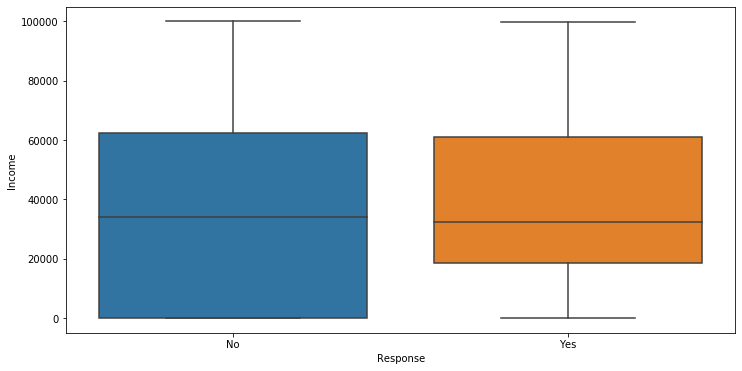

In [64]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Income' , x = 'Response', data = data)
plt.show()

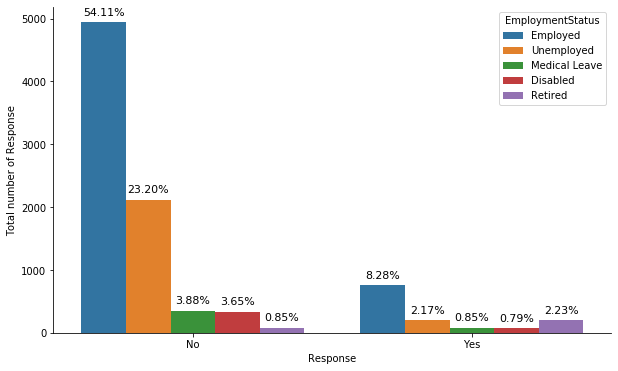

In [65]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Response',hue = 'EmploymentStatus' ,data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

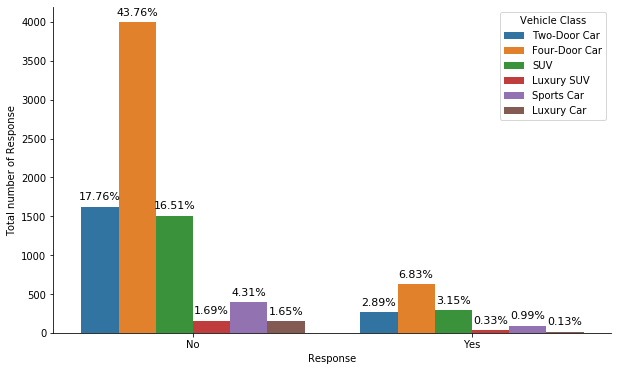

In [66]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Response',hue = 'Vehicle Class' ,data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

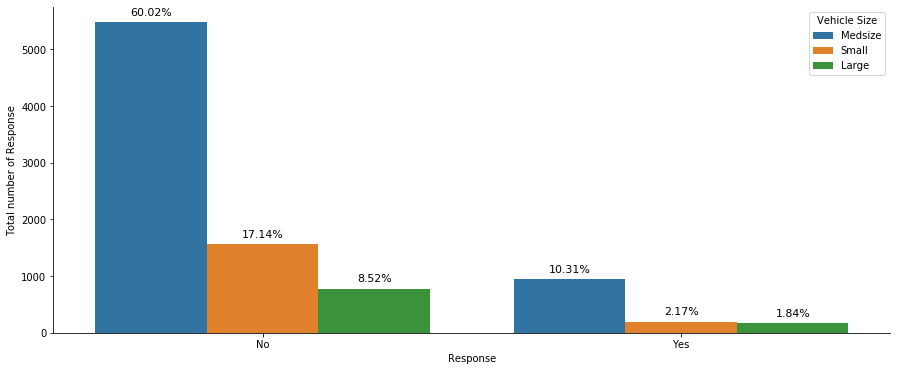

In [67]:
plt.figure(figsize=(15,6))
ax = sns.countplot('Response',hue = 'Vehicle Size' ,data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

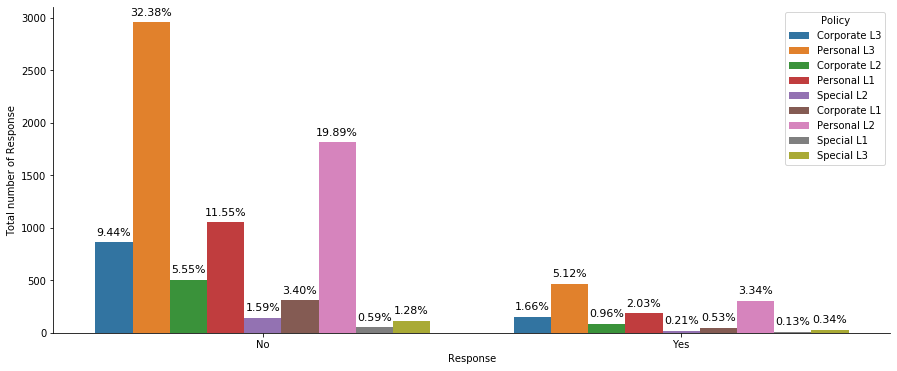

In [68]:
plt.figure(figsize=(15,6))
ax = sns.countplot('Response',hue = 'Policy' ,data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

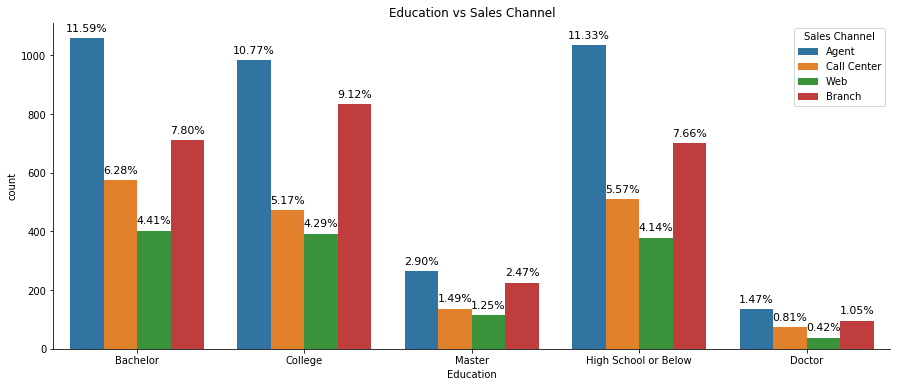

In [69]:
plt.figure(figsize=(15,6))
ax = sns.countplot('Education',hue = 'Sales Channel' ,data = data)
annot_plot(ax, 0.08,1)
plt.title('Education vs Sales Channel')
plt.show()

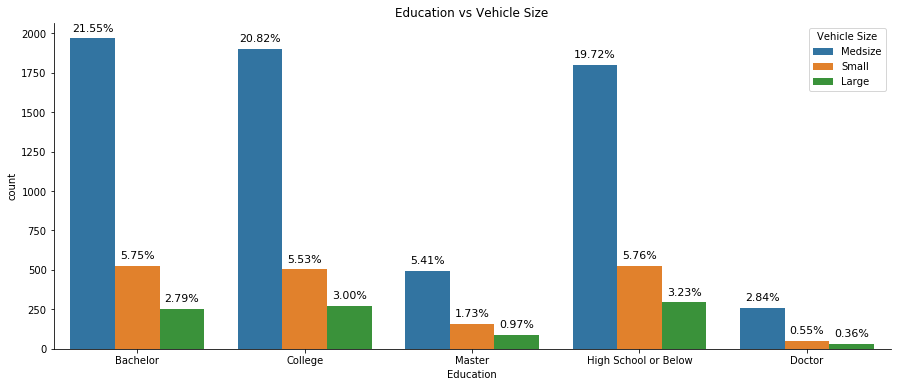

In [70]:
plt.figure(figsize=(15,6))
ax = sns.countplot('Education',hue = 'Vehicle Size' ,data = data)
annot_plot(ax, 0.08,1)
plt.title('Education vs Vehicle Size')
plt.show()

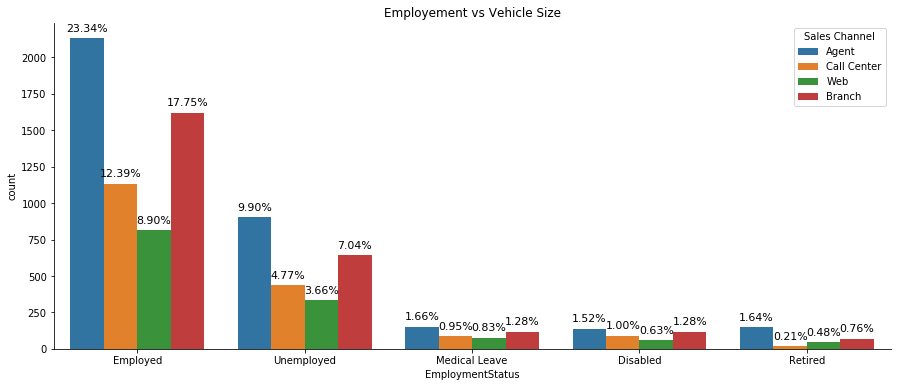

In [71]:
plt.figure(figsize=(15,6))
ax = sns.countplot('EmploymentStatus',hue = 'Sales Channel' ,data = data)
annot_plot(ax, 0.08,1)
plt.title('Employement vs Vehicle Size')
plt.show()

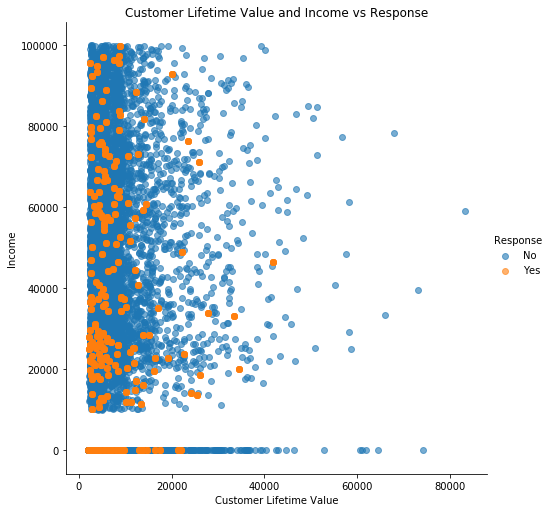

In [72]:
sns.lmplot(x='Customer Lifetime Value', y='Income',data = data,
                     hue = 'Response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)
plt.title('Customer Lifetime Value and Income vs Response')
plt.show()

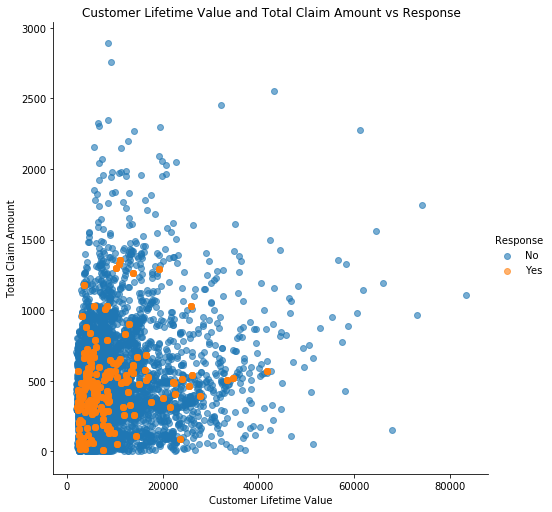

In [73]:
sns.lmplot(x='Customer Lifetime Value', y='Total Claim Amount',data = data,
                     hue = 'Response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)
plt.title('Customer Lifetime Value and Total Claim Amount vs Response')
plt.show()

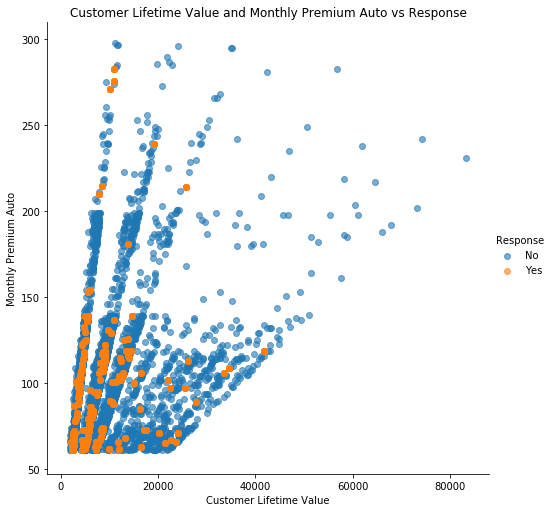

In [74]:
sns.lmplot(x='Customer Lifetime Value', y='Monthly Premium Auto',data = data,
                     hue = 'Response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)
plt.title('Customer Lifetime Value and Monthly Premium Auto vs Response')
plt.show()

We can clearly see that there is a linear relationship between Customer lifetime value and monthly premium auto, but we do not see any relationshio between income and the total claim amount.

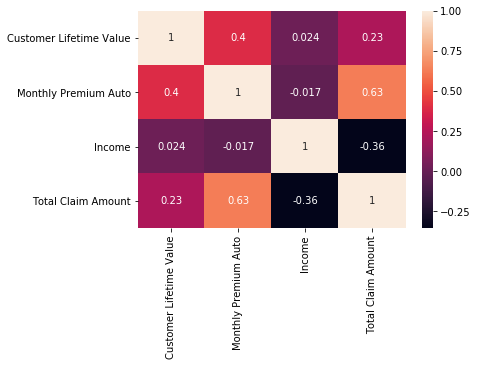

In [75]:
sns.heatmap(data[['Customer Lifetime Value','Monthly Premium Auto','Income','Total Claim Amount']].corr(),annot = True)
plt.show()

And we can clearly see in the co relation map, that customer lifetime value has a better co relation with monthly premium auto and acceptable co relation with total claim amount, but it show's no relationship with income, so again with all the visualization's we can come to the conclusion that we can dis regard the INCOME feature.

# BASE MODEL USING OLS.

In [76]:
cols = data.select_dtypes(object).columns
for i in cols:
    data[i] = le.fit_transform(data[i])

In [77]:
X = data.drop('Customer Lifetime Value',axis=1)
y = data['Customer Lifetime Value']

In [78]:
X_sm = X
X_sm = sm.add_constant(X_sm)
lm = sm.OLS(y,X_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.166
Model:                                 OLS   Adj. R-squared:                  0.164
Method:                      Least Squares   F-statistic:                     78.97
Date:                     Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                             14:53:53   Log-Likelihood:                -92829.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9110   BIC:                         1.859e+05
Df Model:                               23                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1071.0909    499.588      2.144      0.032      91.786    2050.396
Customer                         -0.0768      0.025     -3.078      0.002      -0.126      -0.028
State                            30.1424     51.092      0.590      0.555     -70.010     130.294
Response                       -450.2135    192.547     -2.338      0.019    -827.648     -72.779
Coverage                       -186.3677    113.640     -1.640      0.101    -409.127      36.392
Education                        93.8688     47.764      1.965      0.049       0.241     187.496
Effective To Date                -6.6838      3.869     -1.727      0.084     -14.268       0.901
EmploymentStatus               -105.0512     73.564     -1.428      0.153    -249.252      39.150
Gender                         -140.1122    132.592     -1.057      0.291    -400.022     119.797
Income                            0.0021      0.003      0.659      0.510      -0.004       0.009
Location Code                   109.2173    116.530      0.937      0.349    -119.207     337.641
Marital Status                 -240.8148    110.614     -2.177      0.030    -457.644     -23.986
Monthly Premium Auto             82.7641      2.923     28.315      0.000      77.034      88.494
Months Since Last Claim           6.9809      6.543      1.067      0.286      -5.845      19.807
Months Since Policy Inception    -0.8089      2.372     -0.341      0.733      -5.459       3.841
Number of Open Complaints      -251.7392     72.327     -3.481      0.001    -393.516    -109.963
Number of Policies               64.1685     27.648      2.321      0.020       9.971     118.366
Policy Type                     439.8934    290.903      1.512      0.131    -130.343    1010.129
Policy                          -48.3025     86.215     -0.560      0.575    -217.303     120.698
Renew Offer Type               -349.4798     68.455     -5.105      0.000    -483.668    -215.292
Sales Channel                    20.8988     62.267      0.336      0.737    -101.158     142.956
Total Claim Amount               -0.5866      0.362     -1.621      0.105      -1.296       0.123
Vehicle Class                    44.8664     32.409      1.384      0.166     -18.663     108.396
Vehicle Size                    187.8871    123.302      1.524      0.128     -53.813     429.587
==============================================================================
Omnibus:                     5656.816   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64358.326
Skew:                           2.847   Prob(JB):                         0.00
Kurtosis:                      14.692   Cond. No.                 

<br>  After Looking at the base model and the p-value of the feature's, we know that the Hypothesis for the feature's is
- H0: Feature is not significant
- Ha: Feature is significant  
  But we just cant conclude the significance of the feature's just by base model and also without using any of the feature engineering technique's we have at our disposal.
  So we will first try to do the statistical test's of the feature for the feature selection, we can also use the forward selection and backward elimination , we will use the Variance inflation factor

# Hypothesis Testing

Considering CLTV (Customer Lifetime Value) as the target variable, we shall try to understand how each of the independent variables are contributing towards the target variable.

Since our target variable is a continuous variable, we will have to perform ANOVA to understand how significant are the independent variables towards target variable.

For ANOVA,
- Null hypothesis is that there is no significant difference among the groups
- Alternative hypothesis is that there is at least one significant difference among the groups

# State v/s Customer Lifetime Value

In [91]:
data = pd.read_csv('Insurance_Marketing.csv')

In [92]:
State = data.groupby('State')
Washington = State.get_group('Washington')['Customer Lifetime Value']
Arizona = State.get_group('Arizona')['Customer Lifetime Value']
Nevada = State.get_group('Nevada')['Customer Lifetime Value']
California = State.get_group('California')['Customer Lifetime Value']
Oregon = State.get_group('Oregon')['Customer Lifetime Value']

In [93]:
for i in [Washington,Arizona,Nevada,California,Oregon]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=589.985409403956, pvalue=7.69655090624974e-129) 

NormaltestResult(statistic=1123.931182802557, pvalue=8.73865582665683e-245) 

NormaltestResult(statistic=531.43144944664, pvalue=3.9914160352323387e-116) 

NormaltestResult(statistic=2047.3388756109375, pvalue=0.0) 

NormaltestResult(statistic=1836.7206700158117, pvalue=0.0) 



CLTV of all the 'States' follow a normal distribution.
Hence, we can perform ANOVA test

In [94]:
f_oneway(Washington,Arizona,Nevada,California,Oregon)

F_onewayResult(statistic=0.27289285462119284, pvalue=0.8955985932127517)

* ALL STATE HAVE SAME MEAN'S OF CLTV
* pvalue > 0.05 implies that there is no significant difference in the mean of target variable which means 'State' feature is not significant for predicting 'Customer Lifetime Value'

### Customer Response to marketing calls v/s Customer Lifetime Value :

In [95]:
Response = data[['Customer Lifetime Value','Response']].groupby('Response')
No = Response['Customer Lifetime Value'].get_group('No')
Yes = Response['Customer Lifetime Value'].get_group('Yes')

In [96]:
for i in [No,Yes]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=5322.477891516728, pvalue=0.0) 

NormaltestResult(statistic=639.4950779413575, pvalue=1.3658664040085885e-139) 



CLTV of all the 'Response' follow a normal distribution.
Hence, we can perform ANOVA test or test of mean for independent categories.

In [97]:
ttest_ind(No,Yes)

Ttest_indResult(statistic=0.8533582829612565, pvalue=0.393483030479461)

* RESPONE HAVE SAME MEAN'S OF CLTV
* pvalue > 0.05 implies that there is no significant difference in the mean of target variable which means 'Response' feature is not significant for predicting 'Customer Lifetime Value'

### Coverage Type v/s Customer Lifetime Value :

In [98]:
Coverage = data[['Customer Lifetime Value','Coverage']].groupby('Coverage')
basic = Coverage['Customer Lifetime Value'].get_group('Basic')
extended = Coverage['Customer Lifetime Value'].get_group('Extended')
premium = Coverage['Customer Lifetime Value'].get_group('Premium')

In [99]:
for i in [basic,extended,premium]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3458.849448301252, pvalue=0.0) 

NormaltestResult(statistic=1947.8731066934433, pvalue=0.0) 

NormaltestResult(statistic=503.3468946321326, pvalue=5.007380445967074e-110) 



CLTV of all the 'Coverage' follow a normal distribution.
Hence, we can perform ANOVA test

In [100]:
f_oneway(basic,extended,premium)

F_onewayResult(statistic=133.67511419504908, pvalue=6.0158970099807e-58)

* MEAN'S ARE NOT SAME FOR COVERAGE
* pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Coverage' which means 'Coverage' feature can be a significant for predicting 'Customer Lifetime Value'

### Education v/s Customer Lifetime Value :

In [101]:
Education = data[['Customer Lifetime Value','Education']].groupby('Education')
bachelor = Education['Customer Lifetime Value'].get_group('Bachelor')
college = Education['Customer Lifetime Value'].get_group('College')
highschool = Education['Customer Lifetime Value'].get_group('High School or Below')
master = Education['Customer Lifetime Value'].get_group('Master')
doctor = Education['Customer Lifetime Value'].get_group('Doctor')

In [102]:
for i in [basic,college,highschool,master,doctor]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3458.849448301252, pvalue=0.0) 

NormaltestResult(statistic=1808.0647185961266, pvalue=0.0) 

NormaltestResult(statistic=1797.622885789157, pvalue=0.0) 

NormaltestResult(statistic=420.3468077537673, pvalue=5.282633163257892e-92) 

NormaltestResult(statistic=207.1795478118804, pvalue=1.0269110120928107e-45) 



CLTV of all the categories of 'Education' follow a normal distribution.
Hence, we can perform ANOVA test

In [103]:
f_oneway(bachelor,college,highschool,master,doctor)

F_onewayResult(statistic=2.4228653480521904, pvalue=0.04603615409468821)

* MEAN'S ARE NOT SAME FOR EDUCATION
* pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Education' which means 'Education' feature can be a significant for predicting 'Customer Lifetime Value'

### Employment Status v/s Customer Lifetime Value :

In [104]:
es = data[['Customer Lifetime Value','EmploymentStatus']].groupby('EmploymentStatus')
employed = es['Customer Lifetime Value'].get_group('Employed')
unemployed = es['Customer Lifetime Value'].get_group('Unemployed')
medleave = es['Customer Lifetime Value'].get_group('Medical Leave')
disabled = es['Customer Lifetime Value'].get_group('Disabled')
retired = es['Customer Lifetime Value'].get_group('Retired')

In [105]:
for i in [employed,unemployed,medleave,disabled,retired]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3761.129277691408, pvalue=0.0) 

NormaltestResult(statistic=1679.139433825762, pvalue=0.0) 

NormaltestResult(statistic=235.4863106944144, pvalue=7.324826645525092e-52) 

NormaltestResult(statistic=276.0845869374091, pvalue=1.119421586116707e-60) 

NormaltestResult(statistic=99.68654915712415, pvalue=2.256009325581312e-22) 



CLTV of all the categories of 'Employment Status' follow a normal distribution.
Hence, we can perform ANOVA test

In [106]:
f_oneway(employed,unemployed,medleave,disabled,retired)

F_onewayResult(statistic=3.809808710328605, pvalue=0.00425058662383102)

* MEAN'S ARE NOT SAME FOR Employment Status
* pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Employment Status' which means 'Employment Status' feature can be a significant for predicting 'Customer Lifetime Value'

### Gender v/s Customer Lifetime Value :

In [107]:
g = data[['Customer Lifetime Value','Gender']].groupby('Gender')
f = g['Customer Lifetime Value'].get_group('F')
m = g['Customer Lifetime Value'].get_group('M')

In [108]:
for i in [f,m]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2834.0749107540296, pvalue=0.0) 

NormaltestResult(statistic=3243.1471942337193, pvalue=0.0) 



CLTV of all the categories of 'Gender' follow a normal distribution.
Hence, we can perform ANOVA test or test of mean for independent features.

In [109]:
ttest_ind(f,m)

Ttest_indResult(statistic=1.300686352501256, pvalue=0.19339865630769232)

* MEAN'S ARE SAME FOR GENDER
* pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Gender' which means 'Gender' feature is not significant for predicting 'Customer Lifetime Value'

### Location Code v/s Customer Lifetime Value :

In [110]:
location = data[['Customer Lifetime Value','Location Code']].groupby('Location Code')
sub = location['Customer Lifetime Value'].get_group('Suburban')
urban = location['Customer Lifetime Value'].get_group('Urban')
rural = location['Customer Lifetime Value'].get_group('Rural')

In [111]:
for i in [sub,urban,rural]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=4001.809435806882, pvalue=0.0) 

NormaltestResult(statistic=941.3620057193798, pvalue=3.8533434657380165e-205) 

NormaltestResult(statistic=1122.9340758970607, pvalue=1.4386781520042673e-244) 



CLTV of all the categories of 'Location Code' follow a normal distribution.
Hence, we can perform ANOVA test

In [112]:
f_oneway(sub,urban,rural)

F_onewayResult(statistic=0.10800210605345337, pvalue=0.8976268526407198)

* MEAN'S ARE SAME FOR LOCATION CODE
* pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Location Code' which means 'Location Code' feature is not significant for predicting 'Customer Lifetime Value'

### Marital Status v/s Customer Lifetime Value :

In [113]:
MaritalStatus = data[['Customer Lifetime Value','Marital Status']].groupby('Marital Status')
Married = MaritalStatus['Customer Lifetime Value'].get_group('Married')
Single = MaritalStatus['Customer Lifetime Value'].get_group('Single')
Divorced = MaritalStatus['Customer Lifetime Value'].get_group('Divorced')

In [114]:
for i in [Married,Single,Divorced]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3677.216857754807, pvalue=0.0) 

NormaltestResult(statistic=1721.914498898464, pvalue=0.0) 

NormaltestResult(statistic=680.597010523175, pvalue=1.6226952503119905e-148) 



CLTV of all the categories of 'Location Code' follow a normal distribution.
Hence, we can perform ANOVA test

In [115]:
f_oneway(Married,Single,Divorced)

F_onewayResult(statistic=3.317664937589139, pvalue=0.036281036735873)

* MEANS ARE NOT SAME Marital Status
* pvalue < 0.05 implies that there is significant difference in the mean of target variable for at least on Group of 'Marital Status' which means 'Marital Status' feature can be significant for predicting 'Customer Lifetime Value'

### Policy v/s Customer Lifetime Value :

In [116]:
Policy  = data[['Customer Lifetime Value','Policy']].groupby('Policy')
p3 = Policy['Customer Lifetime Value'].get_group('Personal L3')
p2 = Policy['Customer Lifetime Value'].get_group('Personal L2')
p1 = Policy['Customer Lifetime Value'].get_group('Personal L1')
c3 = Policy['Customer Lifetime Value'].get_group('Corporate L3')
c2 = Policy['Customer Lifetime Value'].get_group('Corporate L2')
c1 = Policy['Customer Lifetime Value'].get_group('Corporate L1')
s3 = Policy['Customer Lifetime Value'].get_group('Special L3')
s2 = Policy['Customer Lifetime Value'].get_group('Special L2')
s1 = Policy['Customer Lifetime Value'].get_group('Special L1')

In [117]:
for i in [p3,p2,p1,c3,c2,c1,s3,s2,s1]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2454.8806553250483, pvalue=0.0) 

NormaltestResult(statistic=1239.8942061958492, pvalue=5.7596229383194274e-270) 

NormaltestResult(statistic=992.9674497188381, pvalue=2.3980483698011588e-216) 

NormaltestResult(statistic=605.9012411656124, pvalue=2.6928811836326553e-132) 

NormaltestResult(statistic=373.09668872516477, pvalue=9.617970377316392e-82) 

NormaltestResult(statistic=187.8953648881132, pvalue=1.5813934182974064e-41) 

NormaltestResult(statistic=81.04251038237228, pvalue=2.52256560971873e-18) 

NormaltestResult(statistic=98.75159886489641, pvalue=3.6004995993148485e-22) 

NormaltestResult(statistic=19.415176797916622, pvalue=6.0820211456712794e-05) 



CLTV of all the categories of 'Policy' follow a normal distribution.
Hence, we can perform ANOVA test

In [118]:
f_oneway(p3,p2,p1,c3,c2,c1,s3,s2,s1)

F_onewayResult(statistic=1.1839990669675131, pvalue=0.3041951364145143)

* MEANS ARE SAME Marital Status
* pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Policy' which means 'Policy' feature is not significant for predicting 'Customer Lifetime Value'

### Renew Offer Type vs Customer Lifetime Value :

In [119]:
R  = data[['Customer Lifetime Value','Renew Offer Type']].groupby('Renew Offer Type')
o1 = R['Customer Lifetime Value'].get_group('Offer1')
o2 = R['Customer Lifetime Value'].get_group('Offer2')
o3 = R['Customer Lifetime Value'].get_group('Offer3')
o4 = R['Customer Lifetime Value'].get_group('Offer4')

In [120]:
for i in [o1,o2,o3,o4]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2617.6948383126864, pvalue=0.0) 

NormaltestResult(statistic=1936.9308789084942, pvalue=0.0) 

NormaltestResult(statistic=815.8559270625346, pvalue=6.904566619974463e-178) 

NormaltestResult(statistic=642.2059295134014, pvalue=3.5217156184052177e-140) 



CLTV of all the categories of 'Renew Offer Type' follow a normal distribution.
Hence, we can perform ANOVA test

In [121]:
f_oneway(o1,o2,o3,o4)

F_onewayResult(statistic=25.83261444494041, pvalue=1.238399930571374e-16)

* MEANS ARE NOT SAME FOR Renew Offer Type 
* pvalue < 0.05 implies that there is significant difference in the mean of target variable for at least on Group of 'Renew Offer Type' which means 'Renew Offer Type' feature can be significant for predicting 'Customer Lifetime Value'

### Sales Channel vs Customer Lifetime Value :

In [122]:
Sales  = data[['Customer Lifetime Value','Sales Channel']].groupby('Sales Channel')
agent = Sales['Customer Lifetime Value'].get_group('Agent')
branch = Sales['Customer Lifetime Value'].get_group('Branch')
call = Sales['Customer Lifetime Value'].get_group('Call Center')
web = Sales['Customer Lifetime Value'].get_group('Web')

In [123]:
for i in [agent,branch,call,web]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2249.8117586071908, pvalue=0.0) 

NormaltestResult(statistic=1778.5170859072064, pvalue=0.0) 

NormaltestResult(statistic=1209.3339649106563, pvalue=2.4915300560589623e-263) 

NormaltestResult(statistic=866.0244616685382, pvalue=8.814091447361906e-189) 



CLTV of all the categories of 'Sales Channel' follow a normal distribution.
Hence, we can perform ANOVA test

In [124]:
f_oneway(agent,branch,call,web)

F_onewayResult(statistic=0.8805454785276248, pvalue=0.4502779502550758)

* MEANS ARE SAME for Sales Channel
* pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Sales Channel' which means 'Sales Channel' feature is not significant for predicting 'Customer Lifetime Value'

### Vehicle Class vs Customer Lifetime Value :

In [125]:
VC  = data[['Customer Lifetime Value','Vehicle Class']].groupby('Vehicle Class')
fd = VC['Customer Lifetime Value'].get_group('Four-Door Car')
td = VC['Customer Lifetime Value'].get_group('Two-Door Car')
suv = VC['Customer Lifetime Value'].get_group('SUV')
sc = VC['Customer Lifetime Value'].get_group('Sports Car')
ls = VC['Customer Lifetime Value'].get_group('Luxury SUV')
lc = VC['Customer Lifetime Value'].get_group('Luxury Car')

In [126]:
for i in [fd,td,suv,sc,ls,lc]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2591.5563098196517, pvalue=0.0) 

NormaltestResult(statistic=967.8795815175732, pvalue=6.723869874448458e-211) 

NormaltestResult(statistic=911.8062937987764, pvalue=1.0087394816479343e-198) 

NormaltestResult(statistic=256.8651916324882, pvalue=1.6689077848613138e-56) 

NormaltestResult(statistic=93.79133396550114, pvalue=4.300021273979593e-21) 

NormaltestResult(statistic=112.96534867020267, pvalue=2.9504360994555045e-25) 



CLTV of all the categories of 'Vehicle Class' follow a normal distribution.
Hence, we can perform ANOVA test

In [127]:
f_oneway(fd,td,suv,sc,ls,lc)

F_onewayResult(statistic=267.1581168024349, pvalue=2.085525760212929e-267)

* MEANS ARE NOT SAME FOR Vehicle Class 
* pvalue < 0.05 implies that there is significant difference in the mean of target variable for at least on Group of 'Vehicle Class' which means 'Vehicle Class' feature can be significant for predicting 'Customer Lifetime Value'

### Vehicle Size v/s Customer Lifetime Value :

In [128]:
VS  = data[['Customer Lifetime Value','Vehicle Size']].groupby('Vehicle Size')
m = VS['Customer Lifetime Value'].get_group('Medsize')
s = VS['Customer Lifetime Value'].get_group('Small')
l = VS['Customer Lifetime Value'].get_group('Large')

In [129]:
for i in [m,s,l]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=4107.297603156226, pvalue=0.0) 

NormaltestResult(statistic=1277.51103714535, pvalue=3.908435944085235e-278) 

NormaltestResult(statistic=710.5562496753278, pvalue=5.066065984237427e-155) 



CLTV of all the categories of 'Vehicle Size' follow a normal distribution.
Hence, we can perform ANOVA test

In [130]:
f_oneway(m,s,l)

F_onewayResult(statistic=2.382494601032998, pvalue=0.09237737701331775)

* MEANS ARE SAME for Vehicle Size
* pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Vehicle Size' which means 'Vehicle Size' feature is not significant for predicting 'Customer Lifetime Value'

# Furthur Modelling:

- So we did the EDA and also the Statistical Analysis, so now we can just dis regard the feature's which we saw that wouldnt contribute for our model.

In [131]:
data.drop(['State','Customer','Response','EmploymentStatus','Gender','Location Code','Vehicle Size','Policy','Policy Type','Sales Channel','Income','Effective To Date','Education'],axis=1,inplace = True)

In [132]:
data.head()

,Customer Lifetime Value,Coverage,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Renew Offer Type,Total Claim Amount,Vehicle Class
0,2763.519279,Basic,Married,69,32,5,0,1,Offer1,384.811147,Two-Door Car
1,6979.535903,Extended,Single,94,13,42,0,8,Offer3,1131.464935,Four-Door Car
2,12887.431650,Premium,Married,108,18,38,0,2,Offer1,566.472247,Two-Door Car
3,7645.861827,Basic,Married,106,18,65,0,7,Offer1,529.881344,SUV
4,2813.692575,Basic,Single,73,12,44,0,1,Offer1,138.130879,Four-Door Car


- Though the feature's months since policy inception, months since last claim, number of open complaints and number of policies are all numerical, but they are discrete number's and we will consider them as categorical feature's while preparing the model.

- Firstly, according to our EDA, we saw that the number of policies >= 3 have similar trend so we will group all of them as 3

In [133]:
data['Number of Policies'] = np.where(data['Number of Policies']>2,3,data['Number of Policies'])

In [122]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
lr = LinearRegression()
dt = DecisionTreeRegressor()
et = ExtraTreeRegressor()
abr = AdaBoostRegressor()
br = BaggingRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()

In [123]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Second, when we convert the numerical feature's to categorical, our normal practice is label encoding for ordinal data and one hot for nominal data, but we can also use one hot encoding for ordinal data if there isnt any curse of dimensionality, so we will convert the categorical to numerical with one-hot encoding / dummification.

In [134]:
new = pd.get_dummies(data,columns=['Coverage','Marital Status','Number of Policies','Renew Offer Type','Vehicle Class'],drop_first=True)

In [135]:
new.head()

,Customer Lifetime Value,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,Coverage_Extended,Coverage_Premium,Marital Status_Married,Marital Status_Single,Number of Policies_2,Number of Policies_3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,2763.519279,69,32,5,0,384.811147,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,6979.535903,94,13,42,0,1131.464935,1,0,0,1,0,1,0,1,0,0,0,0,0,0
2,12887.431650,108,18,38,0,566.472247,0,1,1,0,1,0,0,0,0,0,0,0,0,1
3,7645.861827,106,18,65,0,529.881344,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,2813.692575,73,12,44,0,138.130879,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Spliting the data into 70(train) and 30(test)

In [136]:
X = new.drop('Customer Lifetime Value',axis=1)
y = new['Customer Lifetime Value']

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [138]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
lr.score(X_test,y_test)

0.6229090552681669

In [140]:
lr.score(X_train,y_train)

0.6389753771298572

So after removing the unnessary feature's our model is giving is an accuracy of about 60%, we would like to take it 70%
in the furthur models.

# Feature Selection-Forward, Backward

### Forward

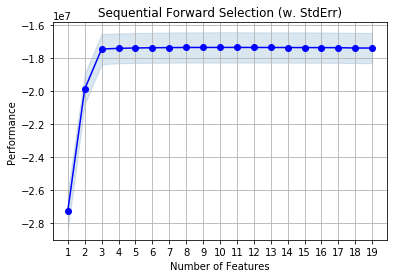

In [141]:
sfs = SFS(lr, k_features='best', forward=True, floating=False, 
          scoring='neg_mean_squared_error', cv=20)
model = sfs.fit(new.drop('Customer Lifetime Value', axis=1),new['Customer Lifetime Value'])
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [142]:
print('Selected features:', sfs.k_feature_idx_)

Selected features: (0, 3, 4, 6, 8, 9, 10, 11, 16, 17)


### Backward

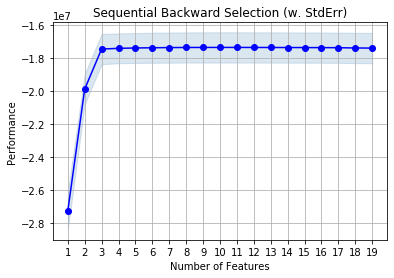

In [149]:
sfs = SFS(lr, k_features='best', forward=False, floating=False, 
          scoring='neg_mean_squared_error', cv=20)
model = sfs.fit(new.drop('Customer Lifetime Value', axis=1).values,new['Customer Lifetime Value'])
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

In [150]:
print('Selected features:', sfs.k_feature_idx_)

Selected features: (0, 3, 4, 6, 8, 9, 10, 11, 16, 17)


In [151]:
X.columns

Index(['Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Total Claim Amount', 'Coverage_Extended', 'Coverage_Premium',
       'Marital Status_Married', 'Marital Status_Single',
       'Number of Policies_2', 'Number of Policies_3',
       'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3',
       'Renew Offer Type_Offer4', 'Vehicle Class_Luxury Car',
       'Vehicle Class_Luxury SUV', 'Vehicle Class_SUV',
       'Vehicle Class_Sports Car', 'Vehicle Class_Two-Door Car'],
      dtype='object')

- Suprisingly Both the forward and backward selection gave us the same features to select for our model, so we will be sticking to the same feature's.

In [152]:
test_X = X[['Monthly Premium Auto','Number of Open Complaints','Total Claim Amount','Coverage_Premium','Marital Status_Single','Number of Policies_2','Number of Policies_3','Renew Offer Type_Offer2','Vehicle Class_SUV','Vehicle Class_Sports Car']]

In [153]:
train = []
test = []

In [154]:
X_train,X_test,y_train,y_test = train_test_split(test_X,y,test_size=0.3,random_state=100)

In [155]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
test.append(lr.score(X_test,y_test))

In [157]:
train.append(lr.score(X_train,y_train))

 So we can clearly see that the feature's removed didnt contribute to tell us the differing variance in the data, so it was a good decision to remove those features.

In [158]:
metrics = [r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error]

In [159]:
y_pred = lr.predict(X_test)

In [160]:
r2 = []
mae = []
mape = []
mse = []

In [161]:
for i in metrics:
    print(i(y_test,y_pred))
    if i == r2_score:
        r2.append(i(y_test,y_pred))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred))
    else:
        mse.append(i(y_test,y_pred))

0.6229724358599135
2097.8073486328676
24.178603379079096
18228661.80460284


- We will consider the r2_Score and the  as the metric's we are going to use to measure the model.

### Finding the best sample by random state for each model

In [162]:
algo = [abr,gbr,dt,et,etr,br,rfr]

In [163]:
for i in algo:
    temp = 0
    print(f"New Model{i}")
    for j in range(1,300,1):
        NXT,NXt,NYT,NYt = train_test_split(X,y,test_size=0.3,random_state=j)
        i.fit(NXT,NYT)
        test_score = i.score(NXt,NYt)
        train_score = i.score(NXT,NYT)
        if test_score>temp:
            temp = test_score
            print(j,train_score,temp)

New ModelAdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)
1 0.6276304631998064 0.5256373134845728
2 0.605595456069298 0.6041649169547589
5 0.6121113747128109 0.611880160319112
11 0.5892284995979115 0.624073555272362
35 0.6005015682690285 0.6344072116044092
New ModelGradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_sta

We can see the best sample for each model, and we can also see which model is a good fit and which model is overfitting/underfitting model.
 AdaBoost is good model, but we will have to check for the metric's
 Gradient Boosting is the best model comparitively, again we will check for the metric's
 DecisionTree and the Extra Tree regressor model's are not working better for this data set , as the model is completly over fitting
 Bagging and random forest regressor model's are again overfitting model, which are not good model's are this data set, but again we will check the metrics.

# Decision Tree Regressor

In [164]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=159)

In [165]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [166]:
y_pred_dt = dt.predict(X_test)

In [167]:
for i in metrics:
    print(i(y_test,y_pred_dt))
    if i == r2_score:
        r2.append(i(y_test,y_pred_dt))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_dt))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_dt))
    else:
        mse.append(i(y_test,y_pred_dt))

0.5418943751052313
1557.6111505611093
12.138762254560605
22597362.27244966


In [168]:
train.append(dt.score(X_train,y_train))
test.append(dt.score(X_test,y_test))

### Extra Tree Regressor.

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=69)

In [170]:
et.fit(X_train,y_train)

ExtraTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                   max_features='auto', max_leaf_nodes=None,
                   min_impurity_decrease=0.0, min_impurity_split=None,
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, random_state=None,
                   splitter='random')

In [171]:
y_pred_et = et.predict(X_test)

In [172]:
for i in metrics:
    print(i(y_test,y_pred_et))
    if i == r2_score:
        r2.append(i(y_test,y_pred_et))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_et))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_et))
    else:
        mse.append(i(y_test,y_pred_et))

0.3533548727520426
1889.1376164640642
14.108833756969394
30936175.189752277


In [173]:
train.append(et.score(X_train,y_train))
test.append(et.score(X_test,y_test))

In [174]:
pd.DataFrame({'Model':['Linear Regression','Decision Tree','Extra Tree'],'R2_Score':r2,'MAE':mae,'MAPE':mape,'MSE':mse})

,Model,R2_Score,MAE,MAPE,MSE
0,Linear Regression,0.622972,2097.807349,24.178603,1.822866e+07
1,Decision Tree,0.541894,1557.611151,12.138762,2.259736e+07
2,Extra Tree,0.353355,1889.137616,14.108834,3.093618e+07


- We can clearly see that the Linear Regression model is having the best r2_Score, and decision tree and extra tree regressor have no better accuracy that so we will have to build our model using ensemlle technique's, boosting and bagging.

# ENSEMBLE METHODS.

### AdaBoost Regressor

In [176]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=83)

In [177]:
abr.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [178]:
y_pred_abr = abr.predict(X_test)

In [179]:
for i in metrics:
    print(i(y_test,y_pred_abr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_abr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_abr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_abr))
    else:
        mse.append(i(y_test,y_pred_abr))

0.6329764595055839
2701.0741608702374
30.304305747366474
19519014.042061508


In [180]:
train.append(abr.score(X_train,y_train))
test.append(abr.score(X_test,y_test))

### Bagging Regressor

In [181]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=292)
br.fit(X_train,y_train)
y_pred_br = br.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_br))
    if i == r2_score:
        r2.append(i(y_test,y_pred_br))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_br))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_br))
    else:
        mse.append(i(y_test,y_pred_br))

0.6962046950070964
1515.478061161474
11.350188973026048
15462530.823246522


In [182]:
train.append(br.score(X_train,y_train))
test.append(br.score(X_test,y_test))

### Extra Tree's Regressor

In [183]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=69)
etr.fit(X_train,y_train)
y_pred_etr = etr.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_etr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_etr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_etr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_etr))
    else:
        mse.append(i(y_test,y_pred_etr))

0.6777929328425556
1516.0280190169042
11.586578869870538
15414721.084160866


In [184]:
train.append(etr.score(X_train,y_train))
test.append(etr.score(X_test,y_test))

### Gradient Boosting Regressor

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=181)
gbr.fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_gbr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_gbr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_gbr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_gbr))
    else:
        mse.append(i(y_test,y_pred_gbr))

0.7029212098123669
1721.0721751275917
13.859375040148961
14785768.397162316


In [186]:
train.append(gbr.score(X_train,y_train))
test.append(gbr.score(X_test,y_test))

### Random Forest Regressor

In [187]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=35)
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_rfr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_rfr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_rfr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_rfr))
    else:
        mse.append(i(y_test,y_pred_rfr))

0.7321846581272196
1441.728382465389
11.126197060333164
12794174.561463876


In [188]:
train.append(rfr.score(X_train,y_train))
test.append(rfr.score(X_test,y_test))

- Of all the model's we are inclined to choose gradient boosting as the next model, and furthur tweak the hyper parameter's of the model and also put this boosting model into bagging regressor and check for the model accuracy.

# Hyper Parameter Tuning

In [192]:
hyper_params_gbr = {'loss':['ls','lad','huber'],'learning_rate':[0.1,0.01,1],'n_estimators':[100,150]}

In [193]:
gbr2 = GradientBoostingRegressor()

In [194]:
model = GridSearchCV(gbr2,param_grid=hyper_params_gbr)

In [195]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=181)

In [196]:
model.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [197]:
model.score(X_test,y_test)

0.7036532384452198

In [198]:
model.score(X_train,y_train)

0.7371078414289501

In [199]:
model.best_params_

{'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 100}

- These are the default parameter's of the model so no hyper parameter tuning for this model is required, let us try and put this model into the bagging regressor.

# Final Model Stacking(Boosting+bagging).

In [200]:
gbr2 = GradientBoostingRegressor()

In [201]:
br2 = BaggingRegressor(gbr2)

### Finding the best sample.

In [202]:
temp = 0
for j in range(1,300,1):
    NXT,NXt,NYT,NYt = train_test_split(X,y,test_size=0.3,random_state=j)
    br2.fit(NXT,NYT)
    test_score = br2.score(NXt,NYt)
    train_score = br2.score(NXT,NYT)
    if test_score>temp:
        temp = test_score
        print(j,train_score,temp)

1 0.7501608238832209 0.6646731312230237
2 0.741380342470761 0.694964379197428
4 0.7361922585454825 0.6956775510370756
35 0.7298036809912134 0.7125362029805453


In [203]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=87)
br2.fit(X_train,y_train)
y_pred_br2 = br2.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_br2))
    if i == r2_score:
        r2.append(i(y_test,y_pred_br2))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_br2))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_br2))
    else:
        mse.append(i(y_test,y_pred_br2))

0.7023172689262633
1641.3149659389985
13.515441786060068
12833913.92207859


In [204]:
train.append(br2.score(X_train,y_train))
test.append(br2.score(X_test,y_test))

# Using KFold Validation:

In [205]:
test_scores = []
train_scores = []
cv = KFold(n_splits=10,random_state=42, shuffle=False)
for train_index,test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    br2.fit(X_train,y_train)
    test_scores.append(br.score(X_test, y_test))
    train_scores.append(br.score(X_train, y_train))

In [206]:
np.mean(train_scores)

0.861887767449873

In [207]:
np.mean(test_scores)

0.8596341054482126

In [208]:
ALL_SCORES = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Extra Tree','AdaBoost','Bagging','Extra Trees','GradientBoosting','Random Forest','Final_Model'],'Training_Score':train,'Testing_Score':test,'R2_Score':r2,'MAE':mae,'MAPE':mape,'MSE':mse})

In [209]:
ALL_SCORES

,Model,Training_Score,Testing_Score,R2_Score,MAE,MAPE,MSE
0,Linear Regression,0.638623,0.622972,0.622972,2097.807349,24.178603,1.822866e+07
1,Decision Tree,1.000000,0.541894,0.541894,1557.611151,12.138762,2.259736e+07
2,Extra Tree,1.000000,0.353355,0.353355,1889.137616,14.108834,3.093618e+07
3,AdaBoost,0.604757,0.632976,0.632976,2701.074161,30.304306,1.951901e+07
4,Bagging,0.941170,0.696205,0.696205,1515.478061,11.350189,1.546253e+07
5,Extra Trees,1.000000,0.677793,0.677793,1516.028019,11.586579,1.541472e+07
6,GradientBoosting,0.737108,0.702921,0.702921,1721.072175,13.859375,1.478577e+07
7,Random Forest,0.951250,0.732185,0.732185,1441.728382,11.126197,1.279417e+07
8,Final_Model,0.735824,0.702317,0.702317,1641.314966,13.515442,1.283391e+07


We can see that after using KFold validation we see that Gradiant Boosting Regressor has given R2 as 70.2 and Training and Test scores are also generalised.

# CLASSIFICATION 

Let us take response as our target variable and build a classification model

In [60]:
df=pd.read_csv('Insurance_Marketing.csv')

In [61]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [62]:
num_col = ['int16','int32','int64','float16','float32','float64']

df_numcols_only1= df.select_dtypes(include= num_col)

In [63]:
cat_col=['object']
df_catcols_only1=df.select_dtypes(include=cat_col)
df_catcols_only1.drop('Response',axis=1,inplace=True)

In [64]:
df_numcols_only1.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [65]:
df_catcols_only1.columns

Index(['Customer', 'State', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [66]:
def chisquare_test(target_variable, categorical_column):
    print('H0: There is NO association between ' + target_variable.name + ' and ' + categorical_column.name)
    print('Ha: There is an association between ' + target_variable.name + ' and ' + categorical_column.name)
    print()
    ct = pd.crosstab(target_variable, categorical_column)
    print(ct)
    chi2_ct = stats.chi2_contingency(ct)
    chival = chi2_ct[0]
    pval = chi2_ct[1]
    print()
    print('chi-val =', chival)
    print('p-val =', pval)
    print()
    rejectH0 = pval < 0.05
    if rejectH0:
        print('Reject H0')
    else:
        print('Failed to reject H0')
    print()
    print('---------------------------------------------------------------')
    return rejectH0

In [67]:
def two_sample_ttest(target_variable, numerical_column):
    print('H0: The mean of ' + numerical_column.name + ' is equal for both categories of ' + target_variable.name)
    print('Ha: The mean of ' + numerical_column.name + ' is NOT equal for both categories of ' + target_variable.name)
    print()
    grp0 = numerical_column[target_variable == 0]
    grp1 = numerical_column[target_variable == 1]
    ttest = stats.ttest_ind(grp0, grp1)
    print(ttest)
    rejectH0 = ttest[1] < 0.05
    print()
    #return rejectH0
    if rejectH0:
        print('Reject H0')
        print('\n')
        print('-------------------------------------------------------------------------')
    else:
        print('Failed to Reject H0')         
        print()
        print('-------------------------------------------------------------------------')

In [68]:
num_cols = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount']

reject = []
not_reject = []
for col in num_cols:
    rejectH0 = two_sample_ttest(df['Response'], df[col])
    
    if rejectH0:
        reject.append(col)
    else:
        not_reject.append(col)
    
print('Columns Fails to reject H0 :', reject)

print()
print('Columns Reject H0 :', not_reject)

H0: The mean of Customer Lifetime Value is equal for both categories of Response
Ha: The mean of Customer Lifetime Value is NOT equal for both categories of Response

Ttest_indResult(statistic=nan, pvalue=nan)

Failed to Reject H0

-------------------------------------------------------------------------
H0: The mean of Income is equal for both categories of Response
Ha: The mean of Income is NOT equal for both categories of Response

Ttest_indResult(statistic=nan, pvalue=nan)

Failed to Reject H0

-------------------------------------------------------------------------
H0: The mean of Monthly Premium Auto is equal for both categories of Response
Ha: The mean of Monthly Premium Auto is NOT equal for both categories of Response

Ttest_indResult(statistic=nan, pvalue=nan)

Failed to Reject H0

-------------------------------------------------------------------------
H0: The mean of Months Since Last Claim is equal for both categories of Response
Ha: The mean of Months Since Last Claim i

In [69]:
cat_cols = ['Customer', 'State', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size']
reject = []
not_reject = []

for col in cat_cols:
    chisquare_test(df['Response'], df[col])
    if rejectH0:
        reject.append(col)
    else:
        not_reject.append(col)
print()    
print('Columns Fails to Reject H0 :', reject)
print()
print('Columns Rejected H0 :', not_reject)

H0: There is NO association between Response and Customer
Ha: There is an association between Response and Customer

Customer  AA10041  AA11235  AA16582  AA30683  AA34092  AA35519  AA56476  \
Response                                                                  
No              1        1        0        1        1        0        0   
Yes             0        0        1        0        0        1        1   

Customer  AA69265  AA71604  AA93585  AB13432  AB21519  AB23825  AB26022  \
Response                                                                  
No              1        1        1        1        0        1        1   
Yes             0        0        0        0        1        0        0   

Customer  AB31813  AB45325  AB60627  AB62982  AB69140  AB72731  AB73565  \
Response                                                                  
No              1        1        1        1        1        1        1   
Yes             0        0        0        0        0   

chi-val = 117.5987535240864
p-val = 2.909076438728731e-26

Reject H0

---------------------------------------------------------------
H0: There is NO association between Response and Policy Type
Ha: There is an association between Response and Policy Type

Policy Type  Corporate Auto  Personal Auto  Special Auto
Response                                                
No                     1680           5830           316
Yes                     288            958            62

chi-val = 1.7306298294691826
p-val = 0.4209189781652979

Failed to reject H0

---------------------------------------------------------------
H0: There is NO association between Response and Policy
Ha: There is an association between Response and Policy

Policy    Corporate L1  Corporate L2  Corporate L3  Personal L1  Personal L2  \
Response                                                                       
No                 311           507           862         1055         1817   
Yes                

So based on this we get all columns so let us build model on all columns

In [70]:
df['Response'].replace({'Yes':1,'No':0},inplace=True)

In [71]:
df['Response'].value_counts()

0    7826
1    1308
Name: Response, dtype: int64

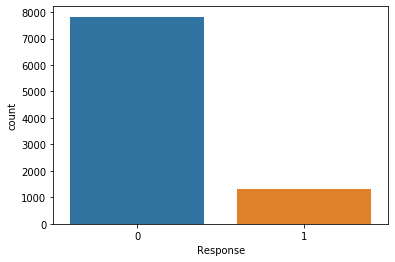

In [72]:
sns.countplot(df['Response'])
plt.show()

In [73]:
df.drop('Customer',axis=1,inplace=True)

In [74]:
df.drop('Effective To Date',axis=1,inplace=True)

In [75]:
new_df=pd.get_dummies(df,drop_first=True)

In [76]:
new_df.head()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,0,56274,69,32,5,0,1,384.811147,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,0,94,13,42,0,8,1131.464935,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,12887.431650,0,48767,108,18,38,0,2,566.472247,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,0,106,18,65,0,7,529.881344,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2813.692575,0,43836,73,12,44,0,1,138.130879,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [77]:
new_df.shape

(9134, 51)

In [78]:
X1=new_df.drop(columns=['Response'],axis=1)
y1=new_df['Response']

In [79]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y1, test_size=0.3, random_state=1)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6393, 50)
(2741, 50)
(6393,)
(2741,)


In [80]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
print('Training score =', model1.score(Xtrain, ytrain))
print('Test score =', model1.score(Xtest, ytest))

Training score = 0.8551540747692788
Test score = 0.8606348048157607


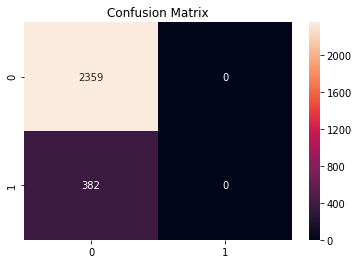

In [82]:
from sklearn.metrics import confusion_matrix
ypred = model1.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [83]:
from sklearn.metrics import confusion_matrix, f1_score
ypred = model1.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
acc = accuracy_score(ytest,ypred)
print('Confusion Matrix: ')
print(cm)
print('Overall accuracy_score: ',acc)

Confusion Matrix: 
[[2359    0]
 [ 382    0]]
Overall accuracy_score:  0.8606348048157607


In [84]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8606348048157607
Precision = nan
Recall = 0.0
F1 Score = nan


In [85]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [86]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.8606348048157607 

 The Miss-classification = 1-Accuracy =  0.1393651951842393 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.0 

 Specificity or True Negative Rate = TN / (TN+FP) =  1.0 

 Positive Predictive value = TP / (TP+FP) =  nan 

 Negative predictive Value = TN / (TN+FN) =  0.8606348048157607 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  nan 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  1.0


In [87]:
y_pred_prob=model1.predict_proba(Xtest)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no  (0)','Prob of yes (1)'])
y_pred_prob_df.head()

,Prob of no (0),Prob of yes (1)
0,0.764382,0.235618
1,0.853013,0.146987
2,0.746351,0.253649
3,0.867917,0.132083
4,0.778159,0.221841


In [88]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=model1.predict_proba(Xtest)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(ytest,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    


With 0.1 threshold the Confusion Matrix is  
 [[ 286 2073]
 [  38  344]] 
 with 630 correct predictions and 38 Type II errors( False Negatives) 

 Sensitivity:  0.900523560209424 Specificity:  0.12123781263247138 



With 0.2 threshold the Confusion Matrix is  
 [[1792  567]
 [ 295   87]] 
 with 1879 correct predictions and 295 Type II errors( False Negatives) 

 Sensitivity:  0.22774869109947643 Specificity:  0.7596439169139466 



With 0.3 threshold the Confusion Matrix is  
 [[2342   17]
 [ 379    3]] 
 with 2345 correct predictions and 379 Type II errors( False Negatives) 

 Sensitivity:  0.007853403141361256 Specificity:  0.9927935565917761 



With 0.4 threshold the Confusion Matrix is  
 [[2359    0]
 [ 382    0]] 
 with 2359 correct predictions and 382 Type II errors( False Negatives) 

 Sensitivity:  0.0 Specificity:  1.0 





ROC AUC = 0.5233848755684479


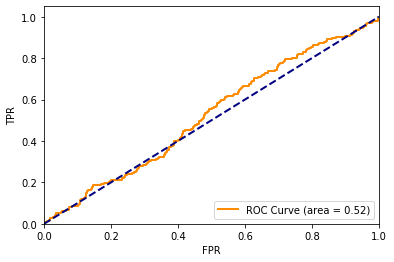

In [89]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = model1.predict_proba(Xtest)
fpr,tpr,threshold = roc_curve(ytest,ypred[:,1])
roc_auc = roc_auc_score(ytest,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

As we see that the ROC curve is 0.52 and it is very less this is because the Target is a imbalance Class .Let us balace it by using sampling techniques we can go for undersampling oversampling and stratified samplig let us stick to oversampling for now and use SMOTE. 

# SMOTE

(9134, 50)
(15652, 50)


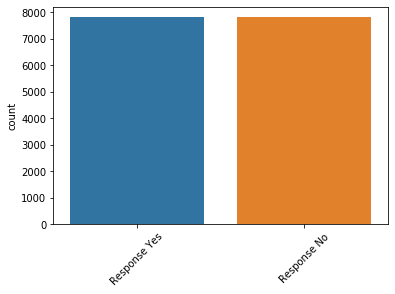

In [90]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

X_resampled, y_resampled = sm.fit_sample(X1, y1)

X_resampled = pd.DataFrame(X_resampled, columns=X1.columns)

print(X1.shape)
print(X_resampled.shape)

sns.countplot(y_resampled)
plt.xticks(np.arange(2),('Response Yes','Response No'),rotation=45)
plt.show()

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10956, 50)
(4696, 50)
(10956,)
(4696,)


# Train Scores

In [92]:
lr1 = LogisticRegression() 
lr1.fit(X_train, y_train) 
trainpred2 = lr1.predict(X_train) 
  
# print classification report 
print(classification_report(y_train, trainpred2)) 

              precision    recall  f1-score   support

           0       0.54      0.23      0.32      5450
           1       0.51      0.81      0.63      5506

    accuracy                           0.52     10956
   macro avg       0.53      0.52      0.48     10956
weighted avg       0.53      0.52      0.48     10956



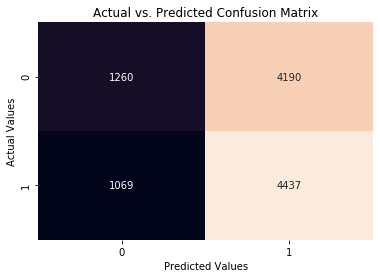

In [93]:
conf_mat = confusion_matrix(y_train, trainpred2)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [94]:
a=confusion_matrix(y_train, trainpred2)
tn = a[0,0]  #True Negative
tp = a[1,1]  #True Positives
fp = a[0,1]  #False Positives
fn = a[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)
print('roc_auc_Score:',roc_auc_score(y_train, trainpred2) )

Accuracy = 0.5199890470974808
Precision = 0.5143155210385998
Recall = 0.8058481656374864
F1 Score = 0.627892167268096
roc_auc_Score: 0.5185204130939726


# Test Scores

In [95]:
predictions1 = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.54      0.23      0.32      2376
           1       0.50      0.80      0.62      2320

    accuracy                           0.51      4696
   macro avg       0.52      0.52      0.47      4696
weighted avg       0.52      0.51      0.47      4696



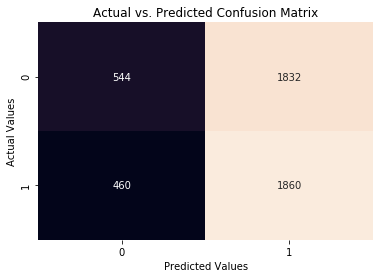

In [96]:
conf_mat = confusion_matrix(y_test, predictions1)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [97]:
a=confusion_matrix(y_test, predictions1)
tn = a[0,0]  #True Negative
tp = a[1,1]  #True Positives
fp = a[0,1]  #False Positives
fn = a[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)
print('roc_auc_Score:',roc_auc_score(y_test,predictions1) )

Accuracy = 0.5119250425894378
Precision = 0.5037919826652221
Recall = 0.8017241379310345
F1 Score = 0.6187624750499002
roc_auc_Score: 0.5153401834436317


In [115]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
scores=cross_val_score(lr1, X_train, y_train, cv=10, scoring='f1')
scores

array([0.56535948, 0.52354049, 0.51448639, 0.61004566, 0.57689111,
       0.56217163, 0.58487395, 0.54107143, 0.52920354, 0.50850492])

In [116]:
np.mean(scores)

0.551614859660691

# Decision Tree

# Train Scores

In [98]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [99]:
trainpred3 = DecisionTree.predict(X_train)
print(classification_report(y_train, trainpred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5450
           1       1.00      1.00      1.00      5506

    accuracy                           1.00     10956
   macro avg       1.00      1.00      1.00     10956
weighted avg       1.00      1.00      1.00     10956



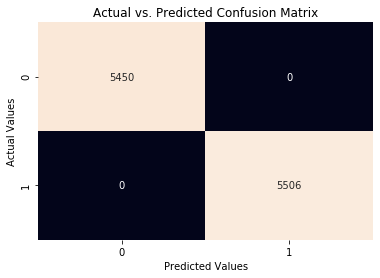

In [100]:
conf_mat = confusion_matrix(y_train, trainpred3)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [101]:
a = confusion_matrix(y_train, trainpred3)
TN = a[0,0]
FP = a[0,1]
FN = a[1,0]
TP = a[1,1]
precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)
print("Precision:", precision)
print("Recall:",Recall)
print("roc_auc_Score:",roc_auc_score(y_train, trainpred3) )
print("f1_score:",f1_score(y_train, trainpred3) )
print("accuracy_score:",accuracy_score(y_train, trainpred3))
print("roc_auc_score:",roc_auc_score(y_train, trainpred3))

Precision: 1.0
Recall: 1.0
roc_auc_Score: 1.0
f1_score: 1.0
accuracy_score: 1.0
roc_auc_score: 1.0


# Test Scores

In [102]:
Pred2 = DecisionTree.predict(X_test)
print(classification_report(y_test, Pred2))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2376
           1       0.90      0.95      0.92      2320

    accuracy                           0.92      4696
   macro avg       0.92      0.92      0.92      4696
weighted avg       0.92      0.92      0.92      4696



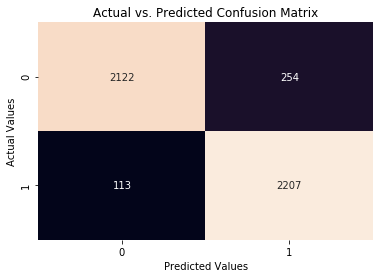

In [103]:
conf_mat = confusion_matrix(y_test, Pred2)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [104]:
a = confusion_matrix(y_test,Pred2)
TN = a[0,0]
FP = a[0,1]
FN = a[1,0]
TP = a[1,1]
precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)
print("Precision:", precision)
print("Recall:",Recall)
print("roc_auc_Score:",roc_auc_score(y_test, Pred2) )
print("f1_score:",f1_score(y_test, Pred2) )
print("accuracy_score:",accuracy_score(y_test, Pred2))
print("roc_auc_score:",roc_auc_score(y_test,Pred2))

Precision: 0.8967899227956115
Recall: 0.9512931034482759
roc_auc_Score: 0.9221953732729594
f1_score: 0.9232378163564108
accuracy_score: 0.9218483816013628
roc_auc_score: 0.9221953732729594


# Cross Validation 

In [105]:
from sklearn.tree import DecisionTreeClassifier
#GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#specify number of folds for k-fold CV
n_folds=10
#parameters to build the model on
parameters={'max_depth':range(1,40)}
#instantiate the model
dtree=DecisionTreeClassifier(criterion='gini',random_state=100)

#fit tree on training data
tree=GridSearchCV(dtree,parameters,cv=n_folds,scoring='accuracy')
tree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',


In [106]:
param=tree.best_params_
param

{'max_depth': 24}

In [107]:
from sklearn.tree import DecisionTreeClassifier
df_default= DecisionTreeClassifier(max_depth=24)
df_default.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [108]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

y_pred_default=df_default.predict(X_test)

print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2376
           1       0.90      0.95      0.92      2320

    accuracy                           0.92      4696
   macro avg       0.92      0.92      0.92      4696
weighted avg       0.92      0.92      0.92      4696



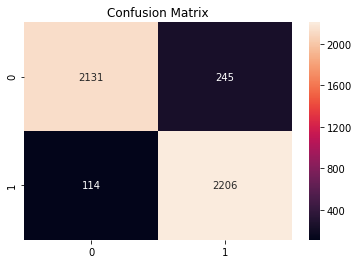

In [109]:
from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,y_pred_default))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [110]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)
print('roc_auc_Score:',roc_auc_score(y_test,y_pred_default))

Accuracy = 0.9235519591141397
Precision = 0.9000407996736026
Recall = 0.9508620689655173
F1 Score = 0.9247537203940475
roc_auc_Score: 0.9238737954255195


In [118]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
cv1=cross_val_score(DecisionTree, X_train, y_train, cv=10, scoring='f1')
cv1

array([0.92609083, 0.92678571, 0.91800357, 0.92142857, 0.91540516,
       0.90972831, 0.92003594, 0.90549055, 0.92482517, 0.92186128])

In [119]:
np.mean(cv1)

0.9189655096764321

ROC AUC = 0.9238737954255195


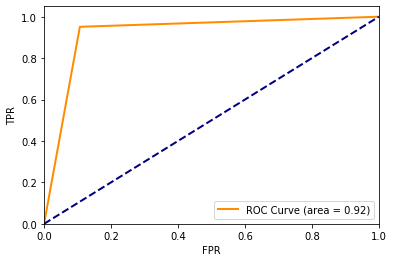

In [121]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = DecisionTree.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,y_pred_default)

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree Gave a F1 score of 0.92 with kfold 10 which is good but we can improve the score by trying Ensemble models.